In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
# %qtconsole

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr

import logging
logging.basicConfig(level=logging.INFO)

# Sorted Spikes

In [3]:
from glob import glob
import os
from src.parameters import PROCESSED_DATA_DIR, STATE_COLORS
from src.visualization import (plot_category_counts, plot_category_duration)

data_type, dim = 'sorted_spikes', '1D'
n_unique_spiking = 3

def add_animal_info(file_path, replay_info):
    animal, day, epoch = file_path.split('/')[-1].split('_')[:3]
    day, epoch = int(day), int(epoch)
    replay_info['animal'] = animal
    replay_info['day'] = day
    replay_info['epoch'] = epoch
    
    return replay_info

file_paths = glob(os.path.join(PROCESSED_DATA_DIR, f'*_{data_type}_{dim}_replay_info.csv'))
replay_info = (pd.concat(
                 [add_animal_info(file_path, pd.read_csv(file_path)) for file_path in file_paths], axis=0)
               .set_index(['animal', 'day', 'epoch', 'ripple_number']))
replay_info = replay_info.loc[replay_info.n_unique_spiking >= n_unique_spiking]

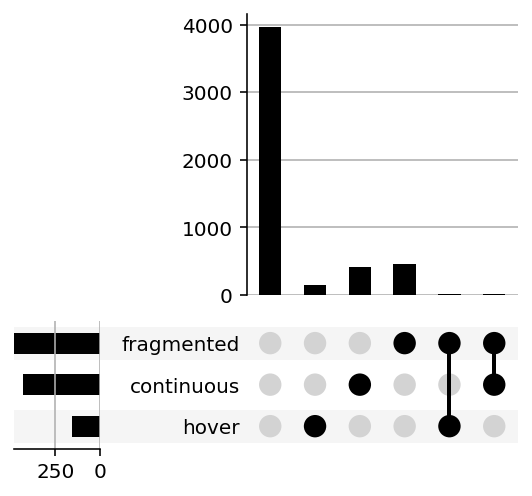

In [4]:
plot_category_counts(replay_info);

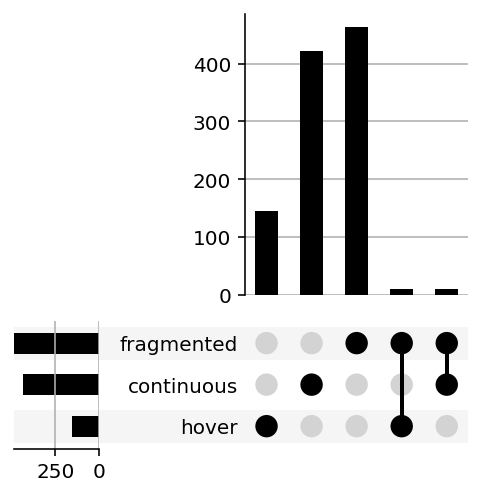

In [5]:
plot_category_counts(replay_info.loc[replay_info.is_classified]);

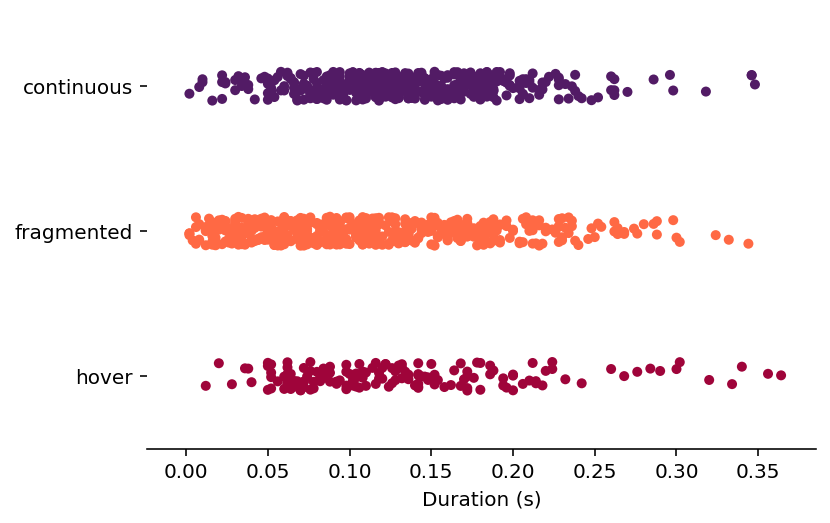

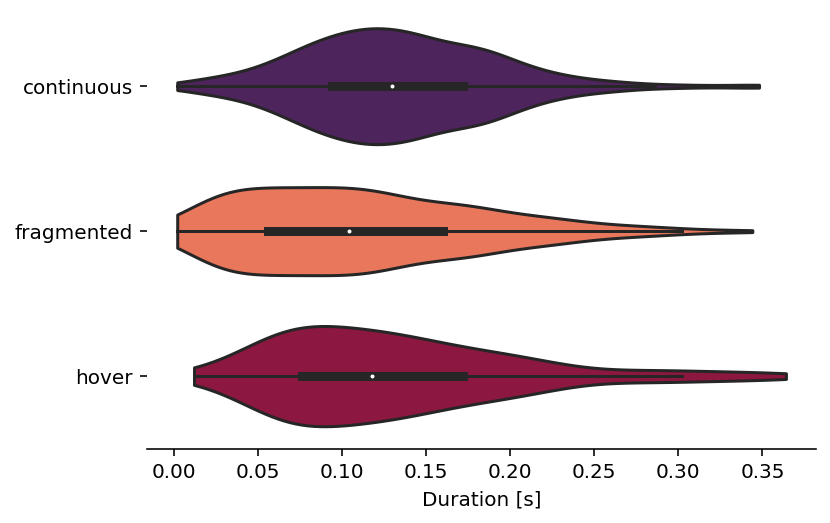

In [6]:
plt.figure()
plot_category_duration(replay_info)


plt.figure()
is_duration_col = replay_info.columns.str.endswith('_duration')
zero_mask = np.isclose(replay_info.loc[:, is_duration_col], 0.0)
sns.violinplot(data=(replay_info.loc[:, is_duration_col].mask(zero_mask)
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0)
plt.xlabel('Duration [s]')
sns.despine(left=True)

Text(0.5, 0, 'Total Duration [s]')

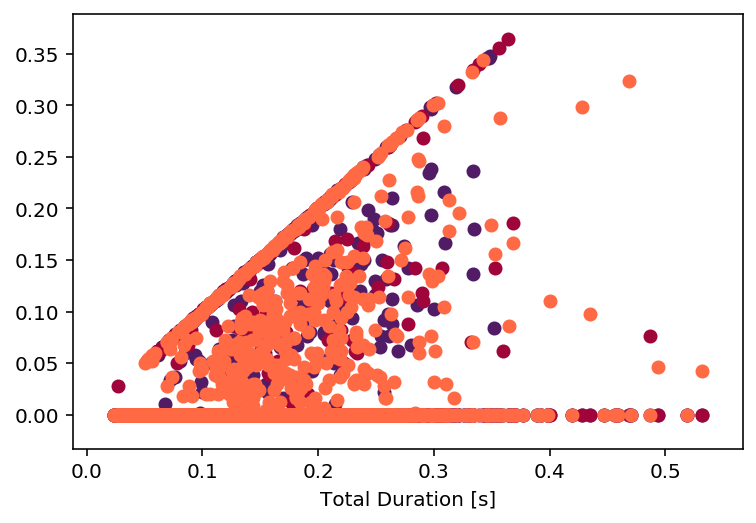

In [7]:
plt.scatter(replay_info.duration, replay_info.continuous_duration, color=STATE_COLORS['continuous'])
plt.scatter(replay_info.duration, replay_info.hover_duration, color=STATE_COLORS['hover'])
plt.scatter(replay_info.duration, replay_info.fragmented_duration, color=STATE_COLORS['fragmented'])
plt.xlabel('Total Duration [s]')

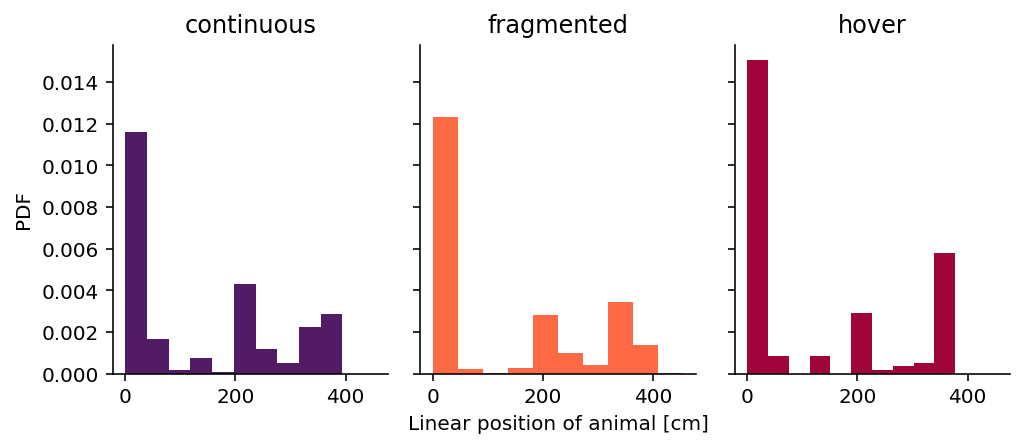

In [8]:
state_names = ['continuous', 'fragmented', 'hover']
fig, axes = plt.subplots(1, len(state_names), figsize=(7, 3),
                         sharex=True, sharey=True, constrained_layout=True)

for ax, state_name in zip(axes.flat, state_names):
    ax.hist(replay_info.loc[replay_info[state_name]].actual_linear_position2,
            density=True, bins=10, color=STATE_COLORS[state_name])
    ax.set_title(state_name)
    
axes.flat[len(state_names) // 2].set_xlabel('Linear position of animal [cm]')
axes[0].set_ylabel('PDF')
sns.despine()

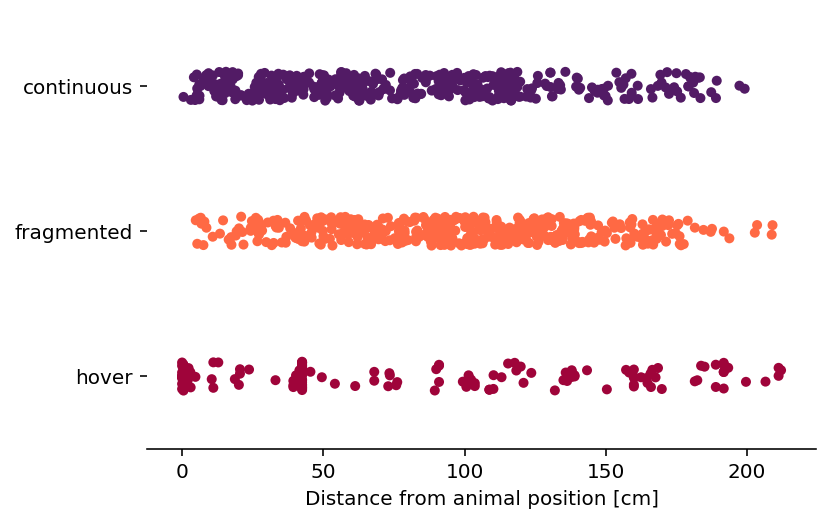

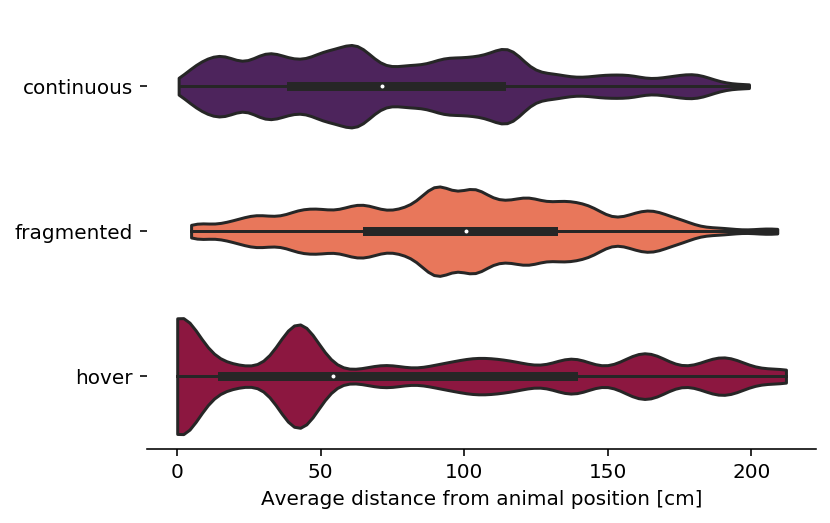

In [9]:
is_col = replay_info.columns.str.endswith('_replay_distance_from_actual_position')
sns.stripplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('Distance from animal position [cm]')
sns.despine(left=True)

plt.figure()
sns.violinplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, bw=0.1)
plt.xlabel('Average distance from animal position [cm]')
sns.despine(left=True)

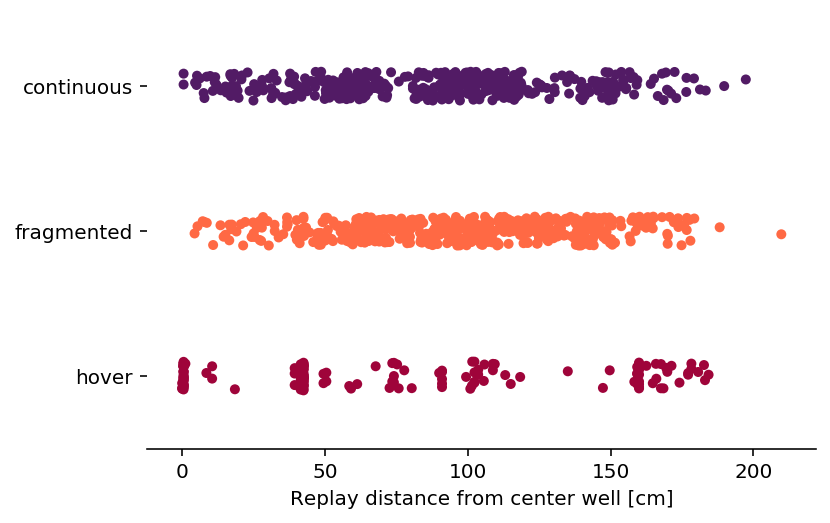

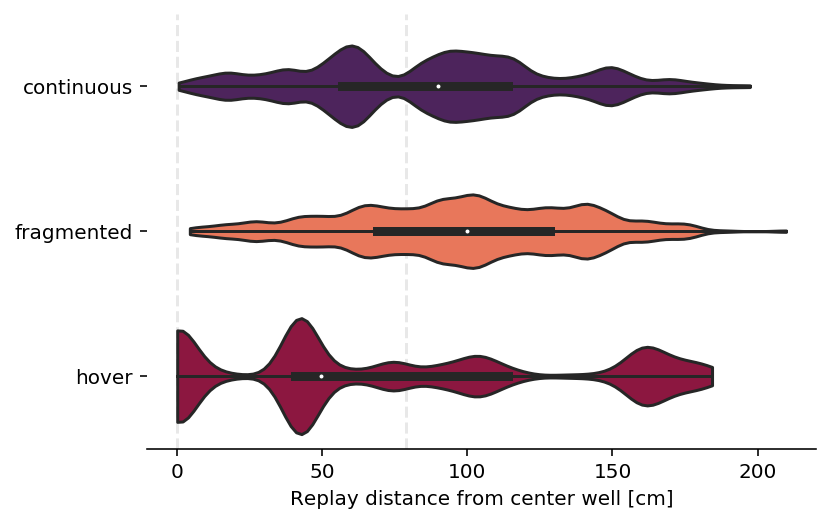

In [10]:
is_col = replay_info.columns.str.endswith('_replay_distance_from_center_well')
sns.stripplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('Replay distance from center well [cm]')
plt.axvline(replay_info.center_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.choice_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
sns.despine(left=True)

plt.figure()
sns.violinplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, bw=0.1)
plt.xlabel('Replay distance from center well [cm]')
plt.axvline(replay_info.center_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.choice_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)

sns.despine(left=True)

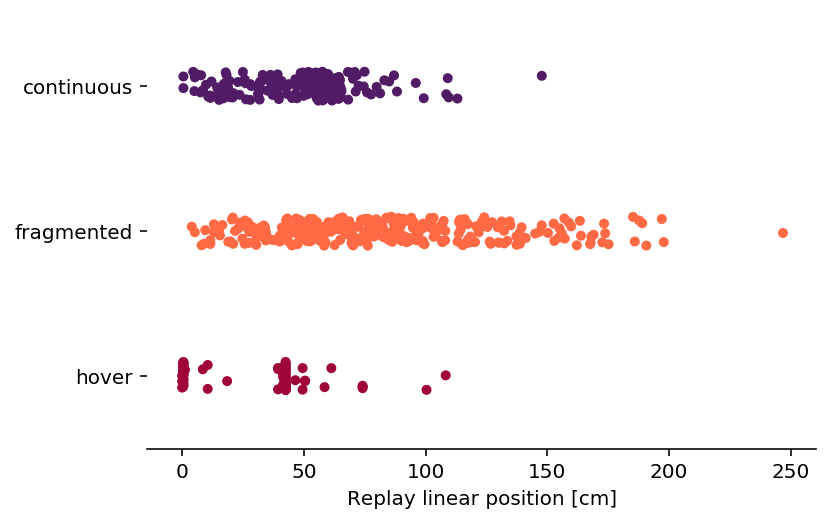

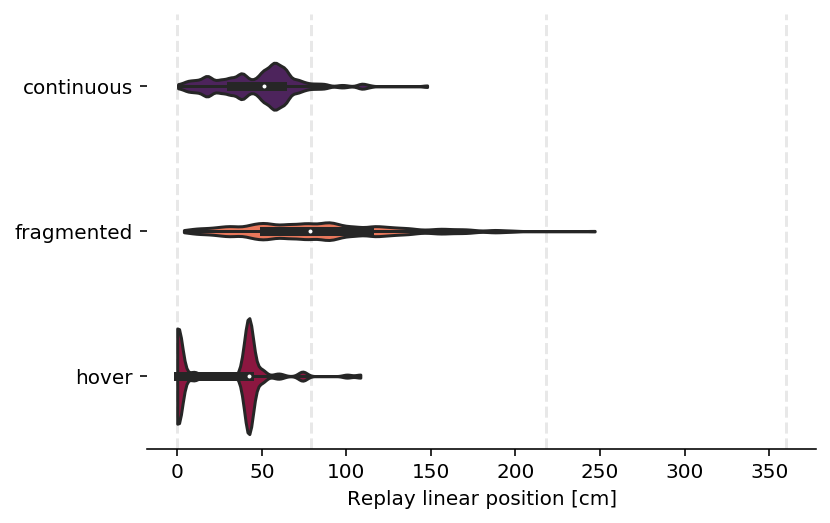

In [11]:
is_col = replay_info.columns.str.endswith('_replay_linear_position')
sns.stripplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('Replay linear position [cm]')
plt.axvline(replay_info.center_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.choice_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.left_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.right_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
sns.despine(left=True)

plt.figure()
sns.violinplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, bw=0.1)
plt.xlabel('Replay linear position [cm]')
plt.axvline(replay_info.center_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.choice_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.left_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.right_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)I 
sns.despine(left=True)

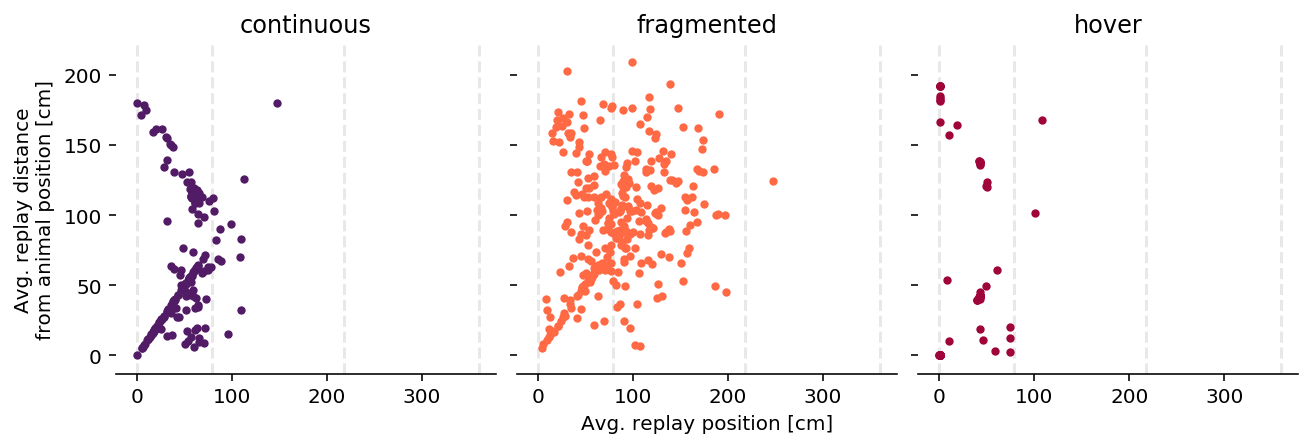

In [12]:
fig, axes = plt.subplots(1, 3, constrained_layout=True, figsize=(9, 3), sharex=True, sharey=True)
state_names = ['continuous', 'fragmented', 'hover']
for ax, state in zip(axes.flat, state_names):
    ax.scatter(replay_info[f'{state}_replay_linear_position'],
               replay_info[f'{state}_replay_distance_from_actual_position'],
               color=STATE_COLORS[state], s=10)
    ax.set_title(state)
    ax.axvline(replay_info.center_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
    ax.axvline(replay_info.choice_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
    ax.axvline(replay_info.left_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
    ax.axvline(replay_info.right_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)

sns.despine(left=True)
axes[0].set_ylabel('Avg. replay distance\nfrom animal position [cm]');
axes[1].set_xlabel('Avg. replay position [cm]');


Text(0.5, 0, 'Actual position [cm]')

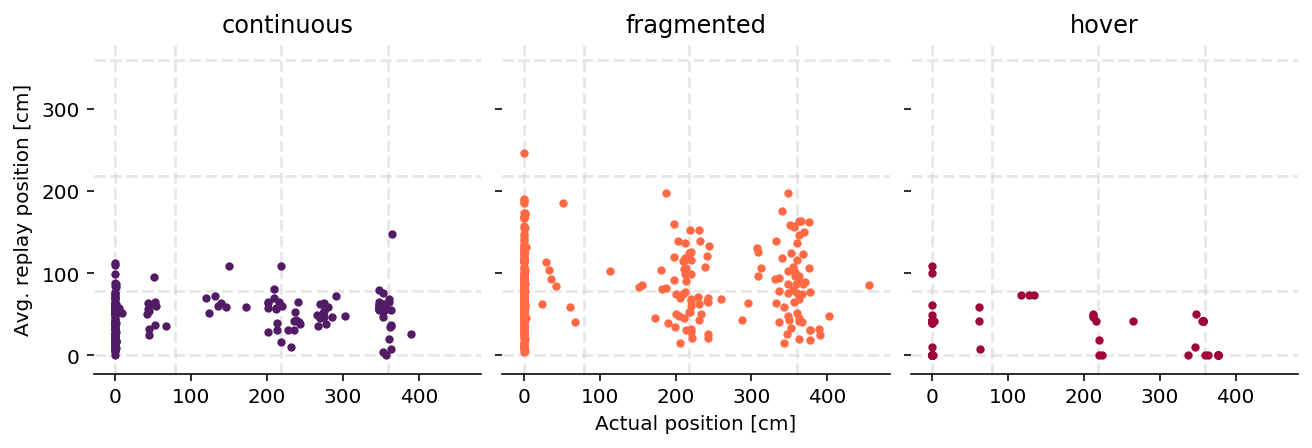

In [13]:
fig, axes = plt.subplots(1, 3, constrained_layout=True, figsize=(9, 3), sharex=True, sharey=True)
state_names = ['continuous', 'fragmented', 'hover']
for ax, state in zip(axes.flat, state_names):
    ax.scatter(replay_info['actual_linear_position2'],
               replay_info[f'{state}_replay_linear_position'],
               color=STATE_COLORS[state], s=10)
    ax.set_title(state)
    ax.axvline(replay_info.center_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
    ax.axvline(replay_info.choice_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
    ax.axvline(replay_info.left_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
    ax.axvline(replay_info.right_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)

    ax.axhline(replay_info.center_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.choice_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.left_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.right_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
sns.despine(left=True)
axes[0].set_ylabel('Avg. replay position [cm]');
axes[1].set_xlabel('Actual position [cm]')

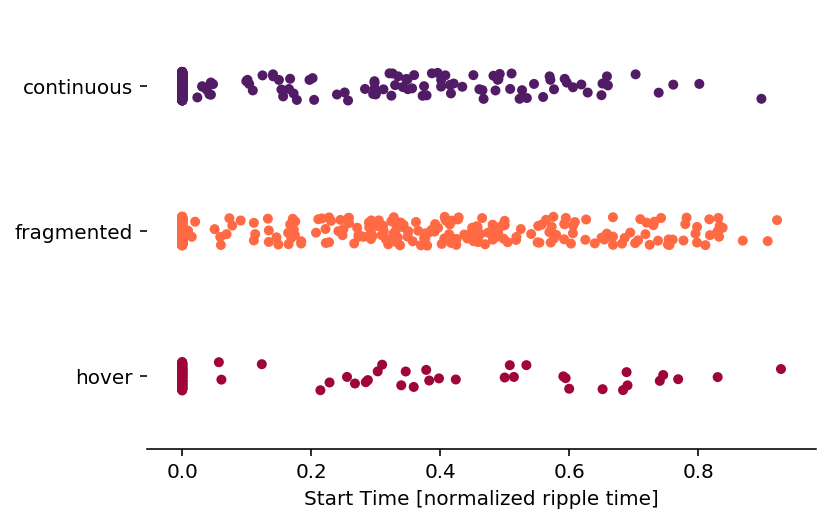

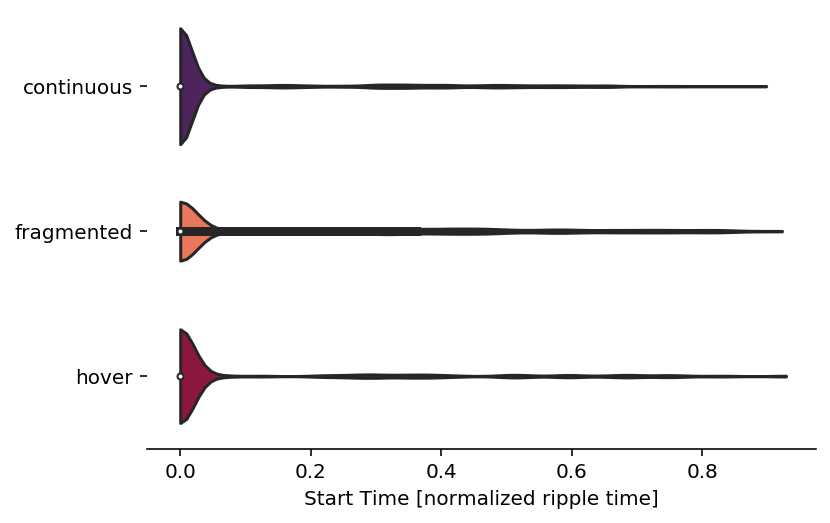

In [14]:
is_col = replay_info.columns.str.endswith('_min_time')
data = (replay_info.loc[:, is_col].rename(columns=lambda c: c.split('_')[0])) / (replay_info.duration.values[:, np.newaxis] * 1000)
sns.stripplot(data=data,
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('Start Time [normalized ripple time]')
sns.despine(left=True)

plt.figure()
sns.violinplot(data=data,
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, bw=0.1)
plt.xlabel('Start Time [normalized ripple time]')
sns.despine(left=True)

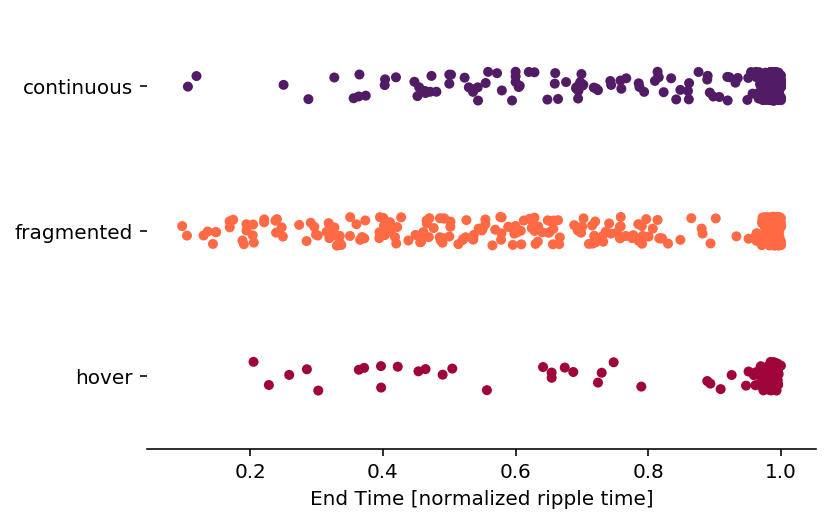

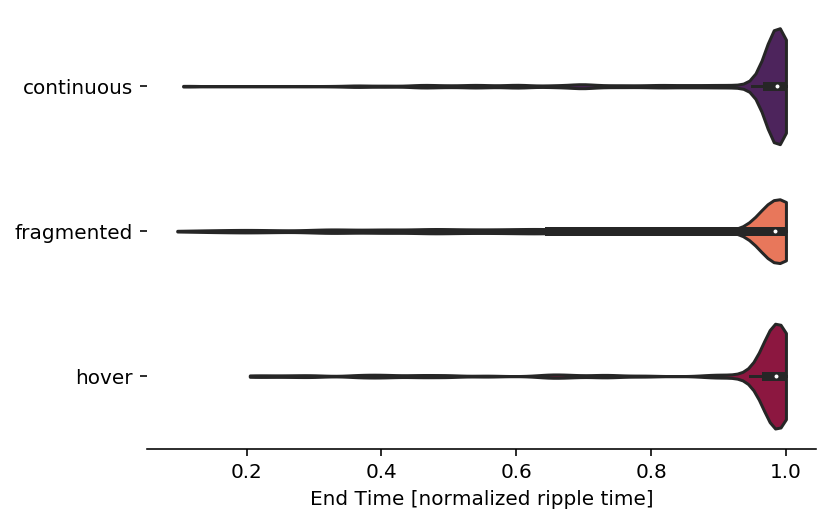

In [15]:
is_col = replay_info.columns.str.endswith('_max_time')
data = (replay_info.loc[:, is_col].rename(columns=lambda c: c.split('_')[0])) / (replay_info.duration.values[:, np.newaxis] * 1000)
sns.stripplot(data=data,
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('End Time [normalized ripple time]')
sns.despine(left=True)

plt.figure()
sns.violinplot(data=data,
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, bw=0.1)
plt.xlabel('End Time [normalized ripple time]')
sns.despine(left=True)

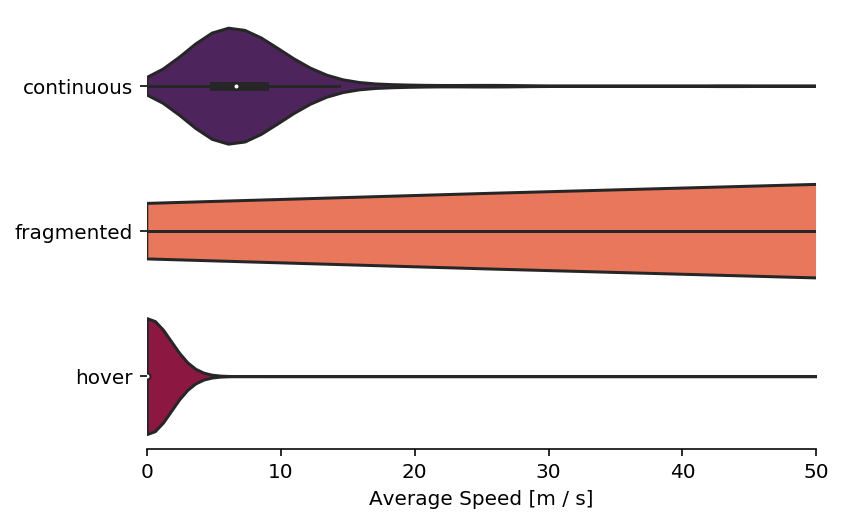

In [16]:
is_col = replay_info.columns.str.endswith('_replay_speed')
sns.violinplot(data=10000 * (replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, scale='width')
plt.xlabel('Average Speed [m / s]')
plt.xlim((-0.001, 50))
sns.despine(left=True)

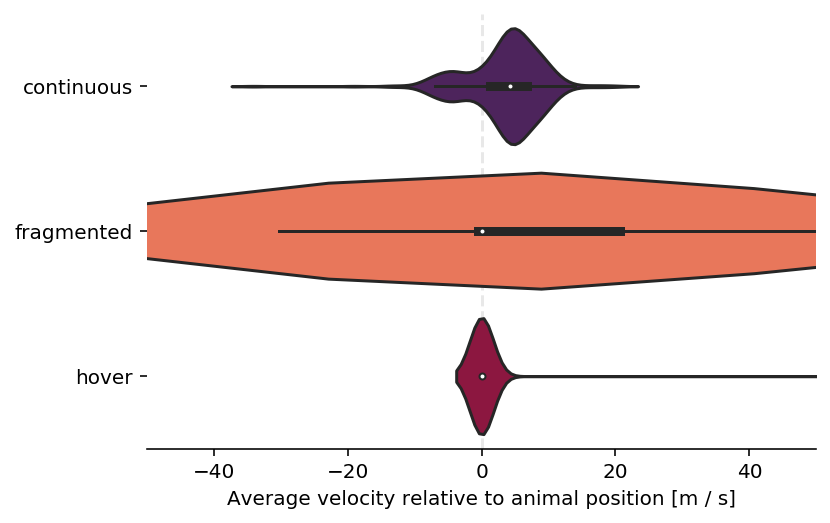

In [17]:
is_col = replay_info.columns.str.endswith('_replay_velocity')
sns.violinplot(data=10000 * (replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, scale='width')
plt.xlabel('Average velocity relative to animal position [m / s]')
plt.xlim([-50, 50])
plt.axvline(0, color='lightgrey', linestyle='--', zorder=0, alpha=0.5)
sns.despine(left=True)

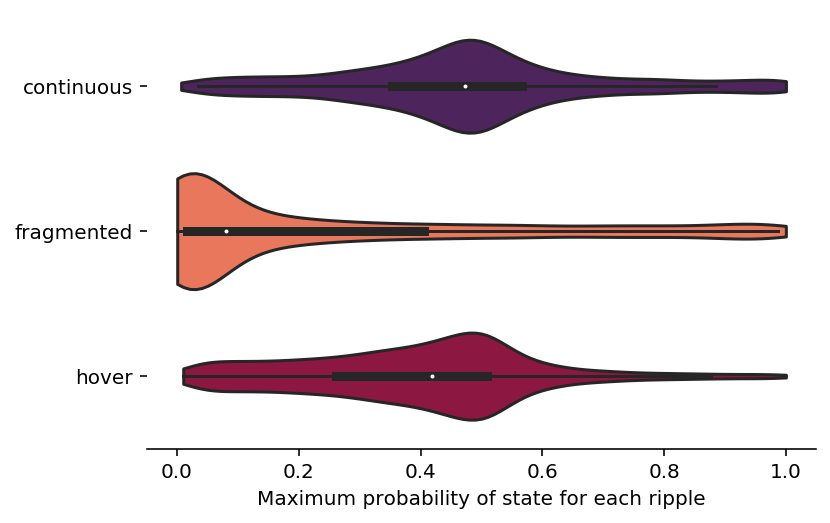

In [18]:
plt.figure()
is_col = replay_info.columns.str.endswith('_max_probability')
sns.violinplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0)
plt.xlabel('Maximum probability of state for each ripple')
sns.despine(left=True)

In [19]:
replay_info.reset_index().groupby('animal').hover.sum()

animal
Cor      0.0
bon    101.0
cha      2.0
con      4.0
dav     12.0
dud      3.0
egy      0.0
fra     26.0
gov      7.0
Name: hover, dtype: float64

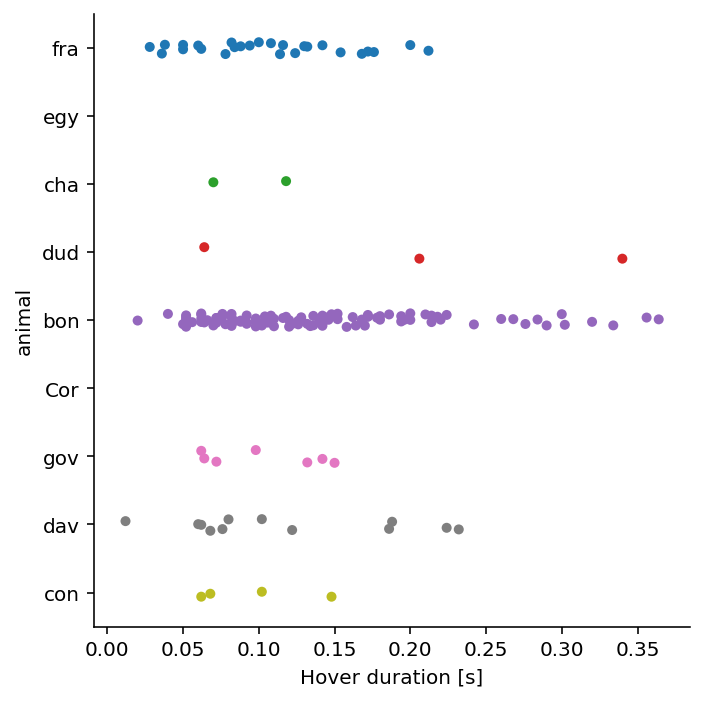

In [20]:
sns.catplot(x='hover_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="strip", jitter=True, aspect=1)
plt.xlabel('Hover duration [s]');

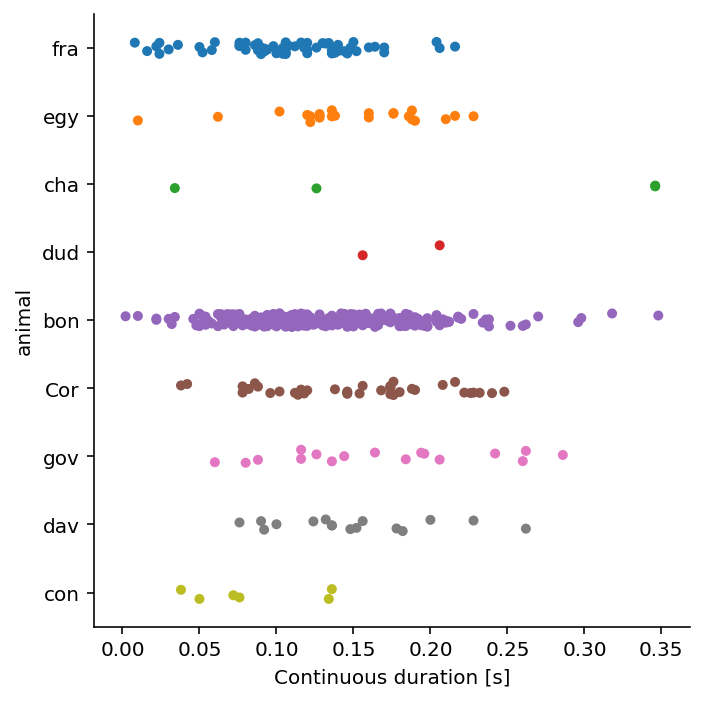

In [21]:
sns.catplot(x='continuous_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="strip", jitter=True, aspect=1)
plt.xlabel('Continuous duration [s]');

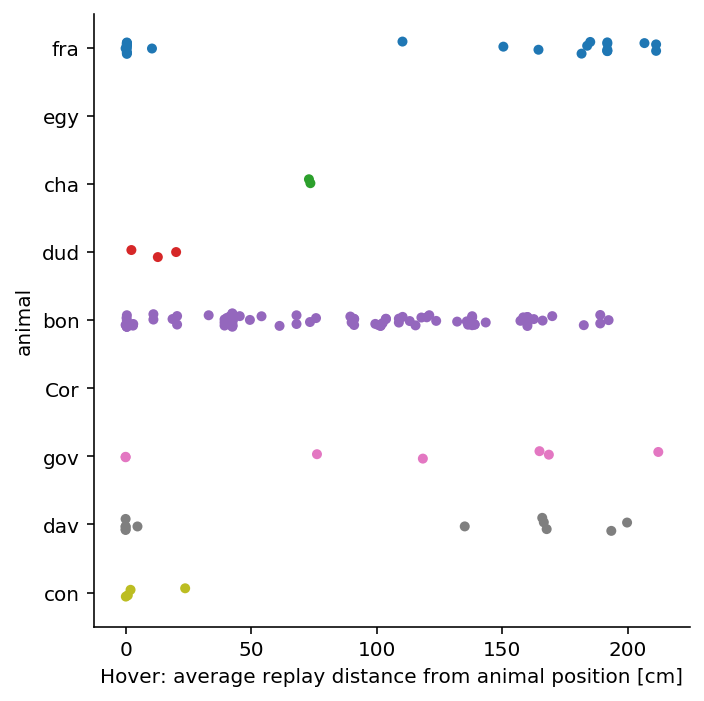

In [22]:
sns.catplot(x='hover_replay_distance_from_actual_position', y='animal', data=replay_info.reset_index(), kind="strip", jitter=True)
plt.xlabel('Hover: average replay distance from animal position [cm]');

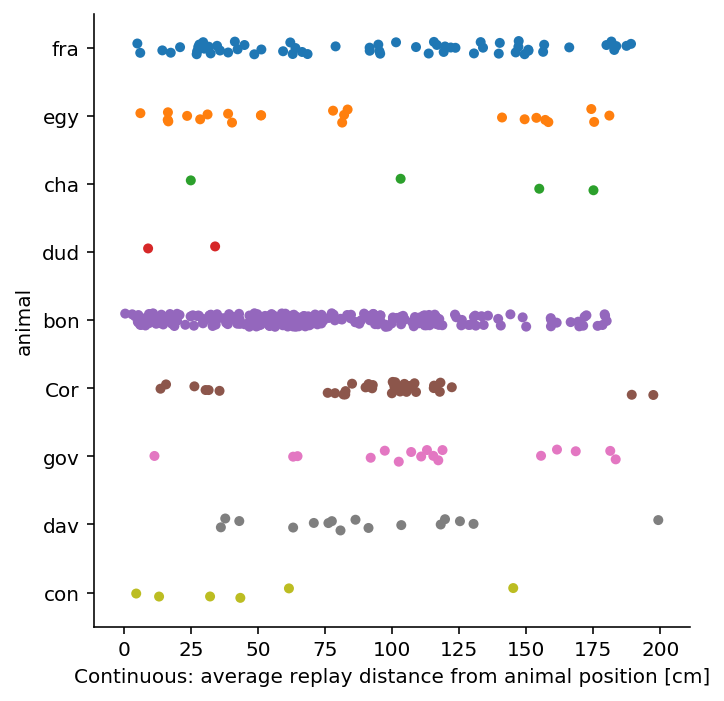

In [23]:
sns.catplot(x='continuous_replay_distance_from_actual_position', y='animal', data=replay_info.reset_index(), kind="strip", jitter=True, aspect=1)
plt.xlabel('Continuous: average replay distance from animal position [cm]');

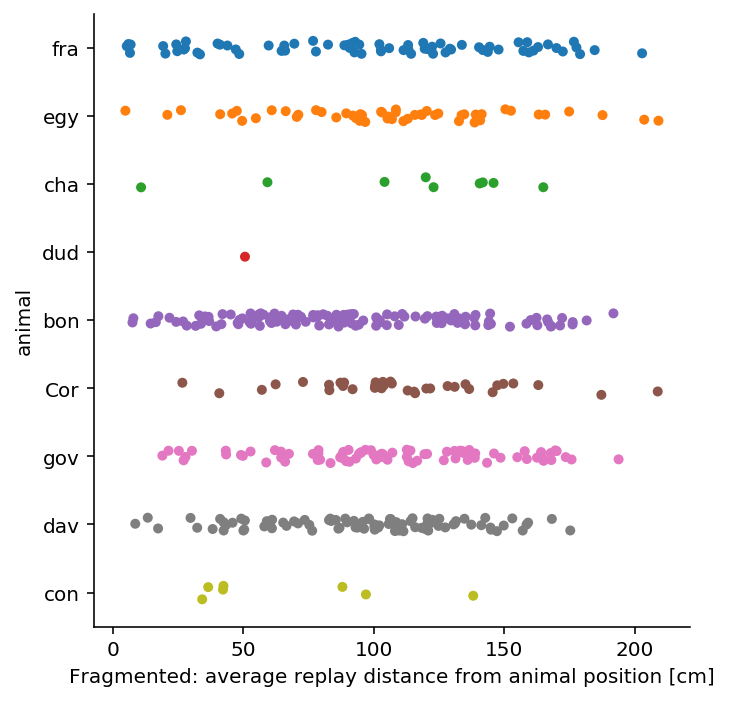

In [24]:
sns.catplot(x='fragmented_replay_distance_from_actual_position', y='animal', data=replay_info.reset_index(), kind="strip", jitter=True, aspect=1)
plt.xlabel('Fragmented: average replay distance from animal position [cm]');

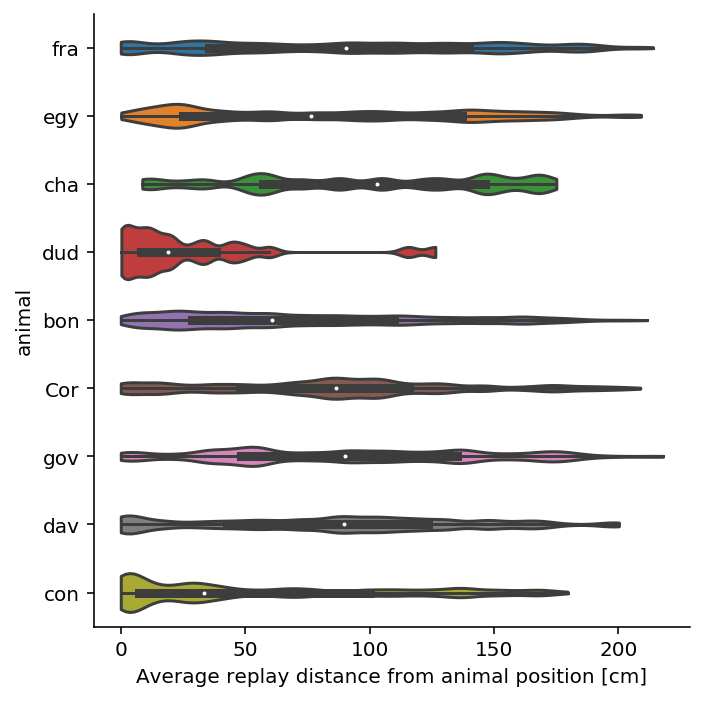

In [25]:
sns.catplot(x='replay_distance_from_actual_position', y='animal', data=replay_info.reset_index(), kind="violin", jitter=True, aspect=1, cut=0, bw=0.1)
plt.xlabel('Average replay distance from animal position [cm]');

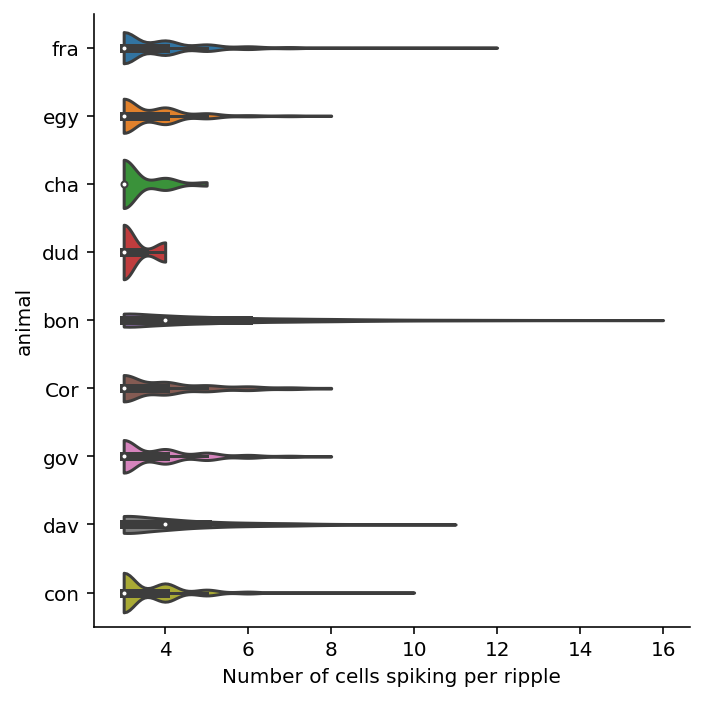

In [26]:
sns.catplot(x='n_unique_spiking', y='animal', data=replay_info.reset_index(), kind="violin", jitter=True, aspect=1, cut=0)
plt.xlabel('Number of cells spiking per ripple');

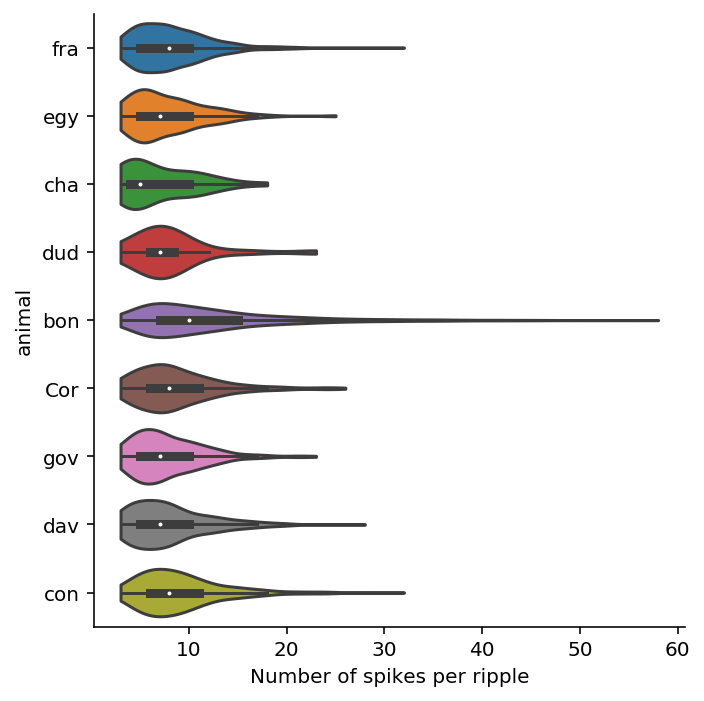

In [27]:
sns.catplot(x='n_total_spikes', y='animal', data=replay_info.reset_index(), kind="violin", aspect=1, cut=0)
plt.xlabel('Number of spikes per ripple');

# Clusterless

In [28]:
data_type, dim = 'clusterless', '1D'
n_unique_spiking = 2

file_paths = glob(os.path.join(PROCESSED_DATA_DIR, f'*_{data_type}_{dim}_replay_info.csv'))
replay_info = (pd.concat(
                 [add_animal_info(file_path, pd.read_csv(file_path)) for file_path in file_paths], axis=0)
               .set_index(['animal', 'day', 'epoch', 'ripple_number']))
replay_info = replay_info.loc[replay_info.n_unique_spiking >= n_unique_spiking]

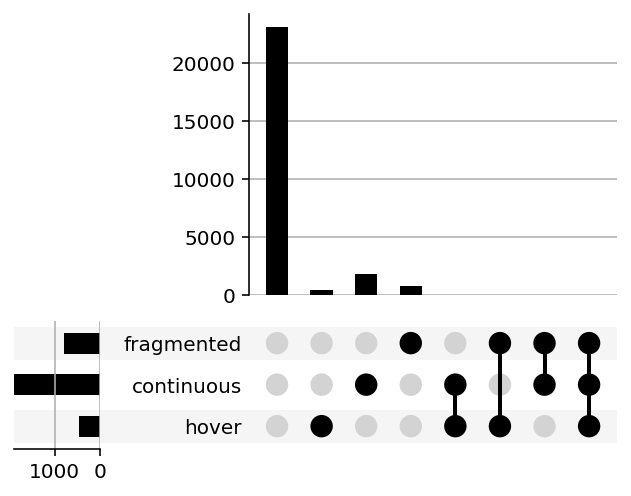

In [29]:
plot_category_counts(replay_info);

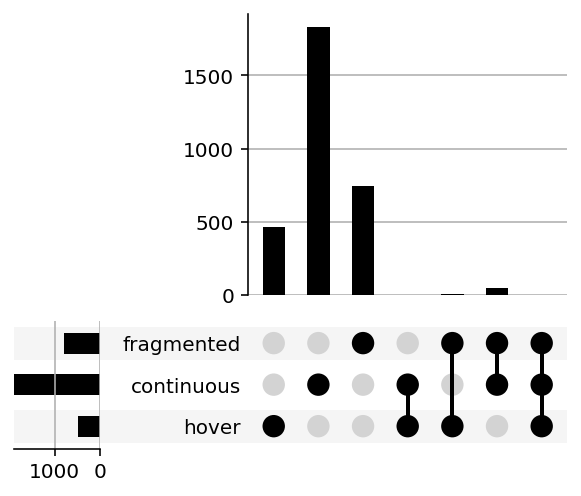

In [30]:
plot_category_counts(replay_info.loc[replay_info.is_classified]);

In [31]:
replay_info.reset_index().groupby('animal').hover.sum()

animal
Cor      22.0
bon      30.0
cha       2.0
con       1.0
dav      56.0
dud       1.0
egy      71.0
fra      20.0
gov      43.0
remy    232.0
Name: hover, dtype: float64

In [32]:
replay_info.reset_index().groupby('animal').continuous.sum()

animal
Cor     149.0
bon     913.0
cha      29.0
con      32.0
dav      28.0
dud      14.0
egy      62.0
fra     315.0
gov     114.0
remy    228.0
Name: continuous, dtype: float64

In [33]:
replay_info.reset_index().groupby('animal').fragmented.sum()

animal
Cor      48.0
bon     370.0
cha      41.0
con      13.0
dav       4.0
dud       1.0
egy       5.0
fra     184.0
gov      28.0
remy    109.0
Name: fragmented, dtype: float64

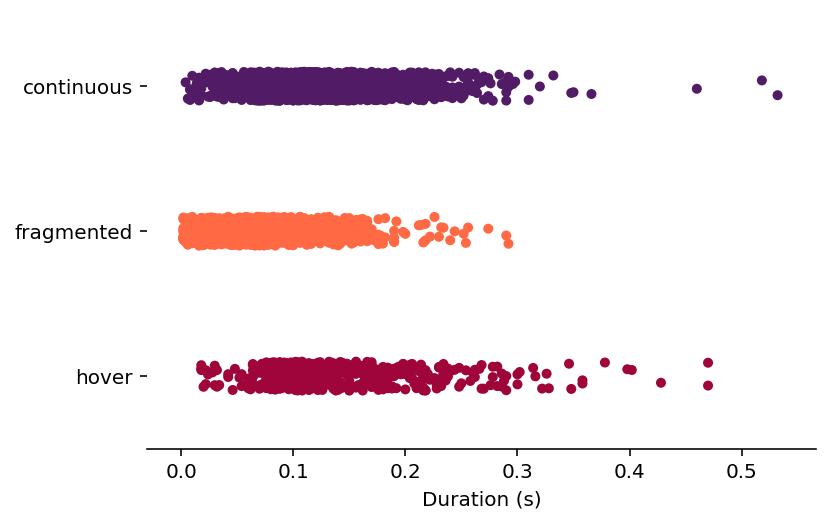

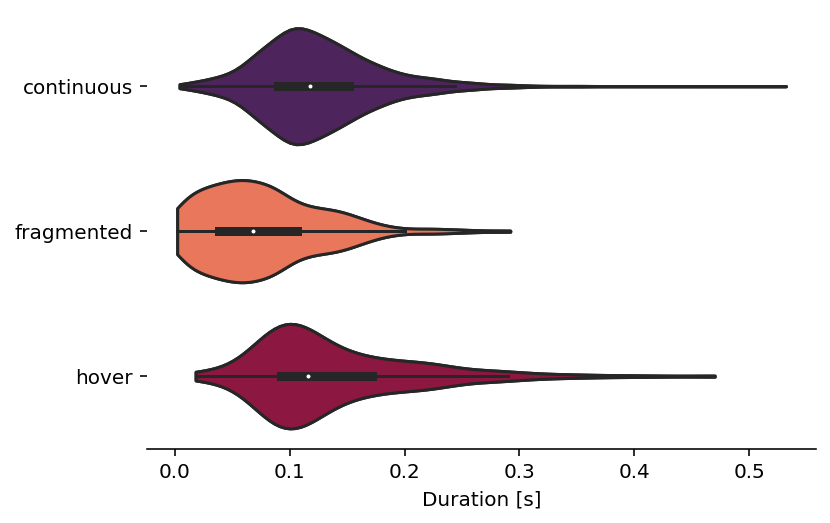

In [34]:
plt.figure()
plot_category_duration(replay_info)

plt.figure()
is_duration_col = replay_info.columns.str.endswith('_duration')
zero_mask = np.isclose(replay_info.loc[:, is_duration_col], 0.0)
sns.violinplot(data=(replay_info.loc[:, is_duration_col].mask(zero_mask)
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0)
plt.xlabel('Duration [s]')
sns.despine(left=True)

hover_pct = 100 * (replay_info.hover_duration / replay_info.duration).replace(0.0, np.nan).rename('hover_percentage')
sns.violinplot(data=(replay_info.loc[:, is_duration_col].mask(zero_mask)
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0)
plt.xlabel('Duration [s]')
sns.despine(left=True)

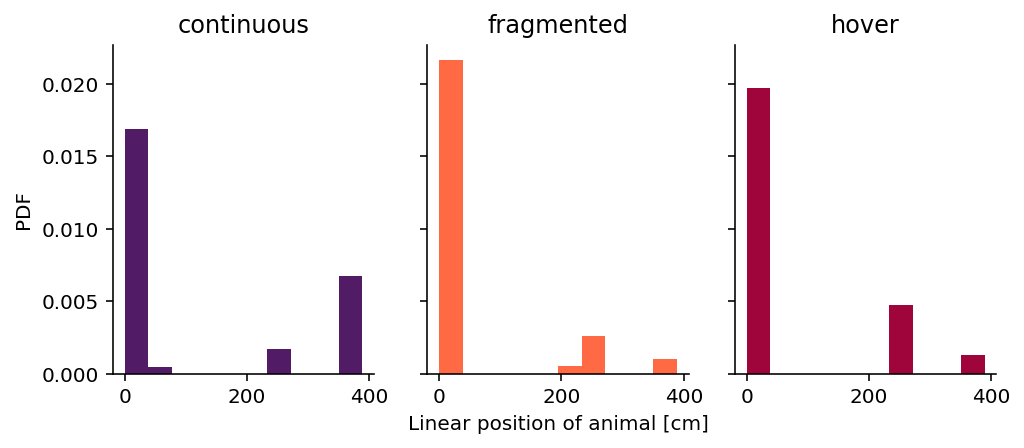

In [35]:
from src.parameters import STATE_COLORS

state_names = ['continuous', 'fragmented', 'hover']
fig, axes = plt.subplots(1, len(state_names), figsize=(7, 3),
                         sharex=True, sharey=True, constrained_layout=True)

for ax, state_name in zip(axes.flat, state_names):
    ax.hist(replay_info.loc[replay_info[state_name]].linear_position2,
            density=True, bins=10, color=STATE_COLORS[state_name])
    ax.set_title(state_name)
    
axes.flat[len(state_names) // 2].set_xlabel('Linear position of animal [cm]')
axes[0].set_ylabel('PDF')
sns.despine()

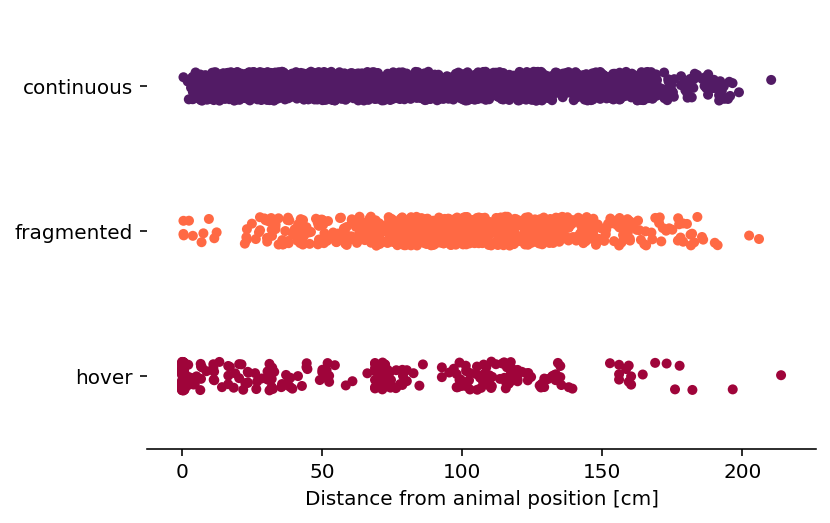

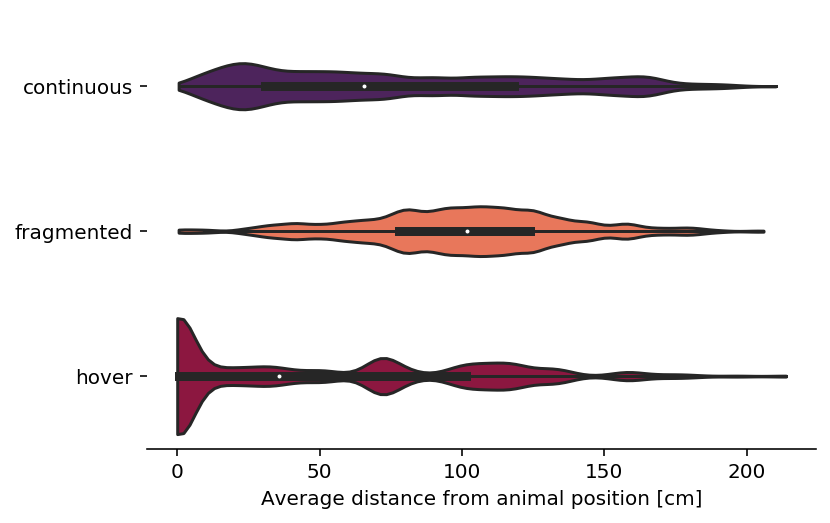

In [36]:
is_col = replay_info.columns.str.endswith('_replay_distance_from_actual_position')
sns.stripplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('Distance from animal position [cm]')
sns.despine(left=True)

plt.figure()
is_col = replay_info.columns.str.endswith('_replay_distance_from_actual_position')
sns.violinplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, bw=0.1)
plt.xlabel('Average distance from animal position [cm]')
sns.despine(left=True)

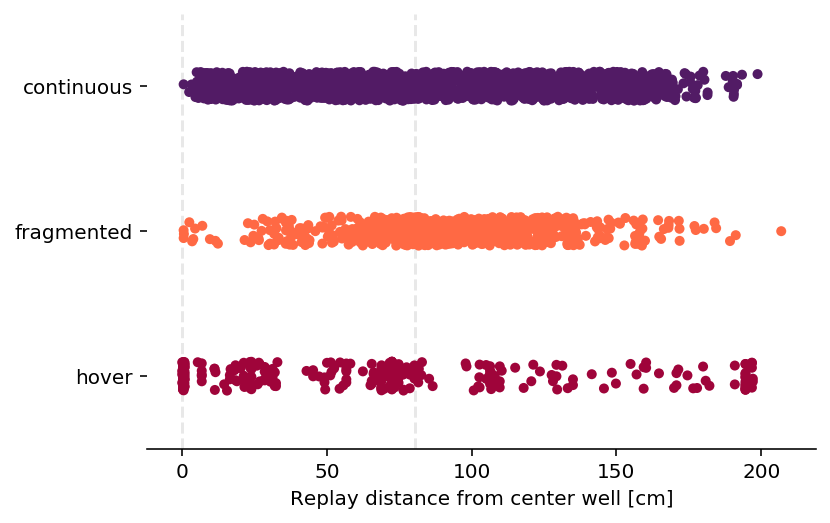

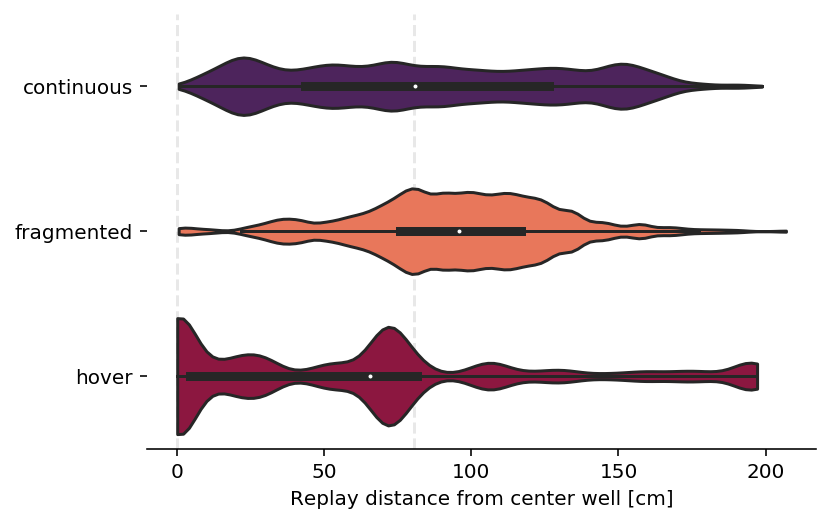

In [37]:
is_col = replay_info.columns.str.endswith('_replay_distance_from_center_well')
sns.stripplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('Replay distance from center well [cm]')
plt.axvline(replay_info.center_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.choice_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)

sns.despine(left=True)

plt.figure()
sns.violinplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, bw=0.1)
plt.xlabel('Replay distance from center well [cm]')
plt.axvline(replay_info.center_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.choice_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)

sns.despine(left=True)

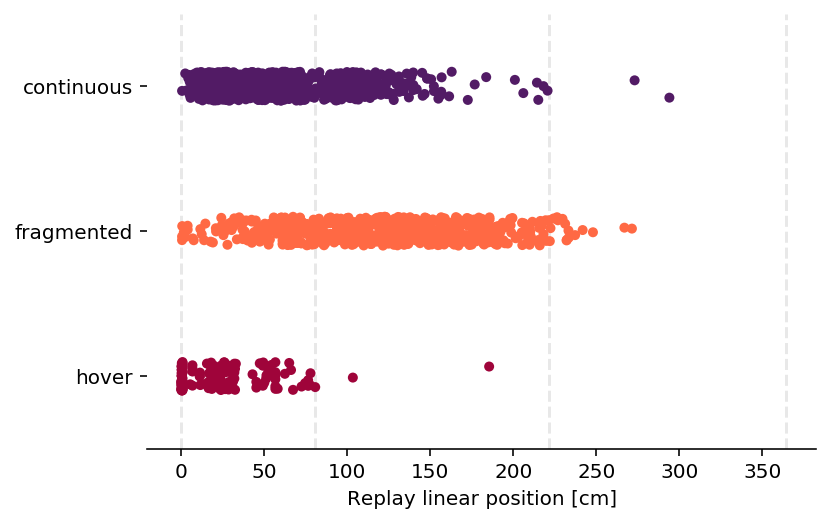

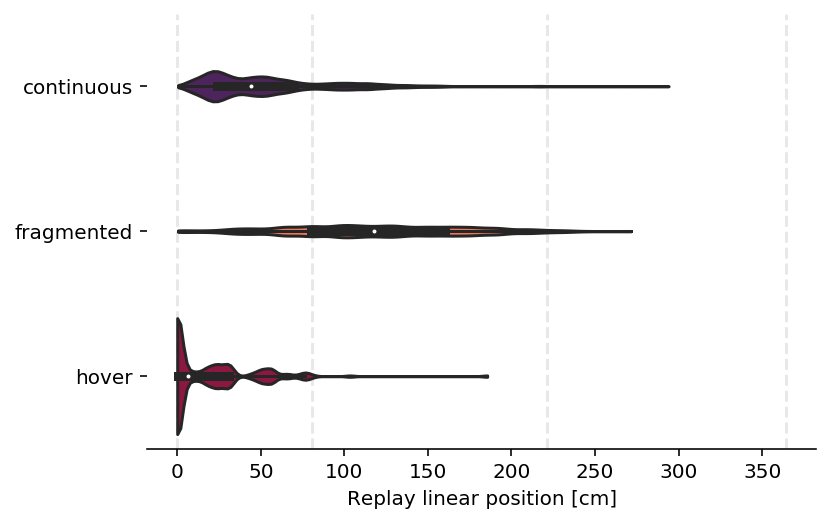

In [38]:
is_col = replay_info.columns.str.endswith('_replay_linear_position')
sns.stripplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('Replay linear position [cm]')
plt.axvline(replay_info.center_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.choice_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.left_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.right_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)

sns.despine(left=True)

plt.figure()
sns.violinplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, bw=0.1)
plt.xlabel('Replay linear position [cm]')
plt.axvline(replay_info.center_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.choice_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.left_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
plt.axvline(replay_info.right_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)

sns.despine(left=True)

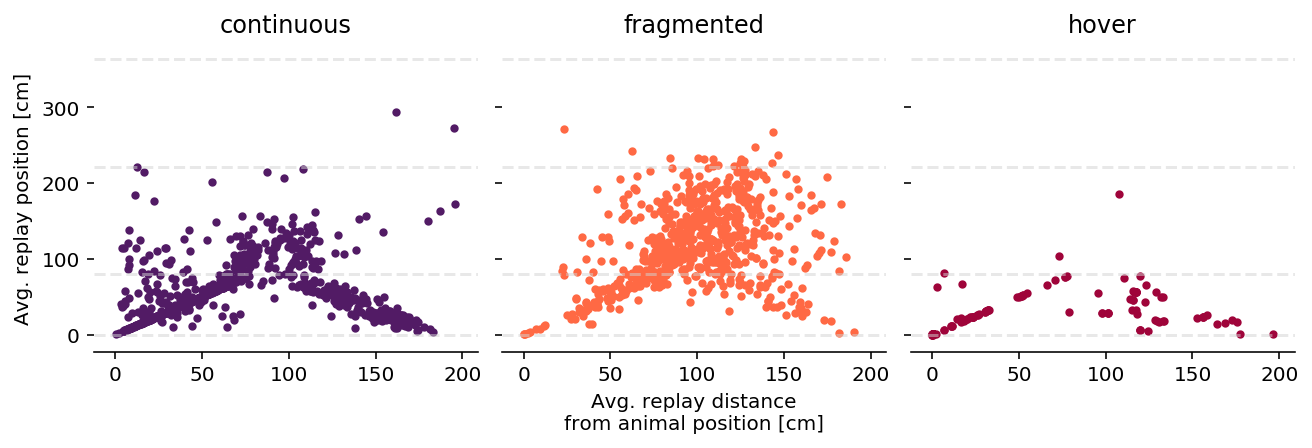

In [39]:
fig, axes = plt.subplots(1, 3, constrained_layout=True, figsize=(9, 3), sharex=True, sharey=True)
state_names = ['continuous', 'fragmented', 'hover']
for ax, state in zip(axes.flat, state_names):
    ax.scatter(replay_info[f'{state}_replay_distance_from_actual_position'],
               replay_info[f'{state}_replay_linear_position'],
               color=STATE_COLORS[state], s=10)
    ax.set_title(state)

    ax.axhline(replay_info.center_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.choice_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.left_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.right_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
sns.despine(left=True)
axes[0].set_ylabel('Avg. replay position [cm]')
axes[1].set_xlabel('Avg. replay distance\nfrom animal position [cm]');


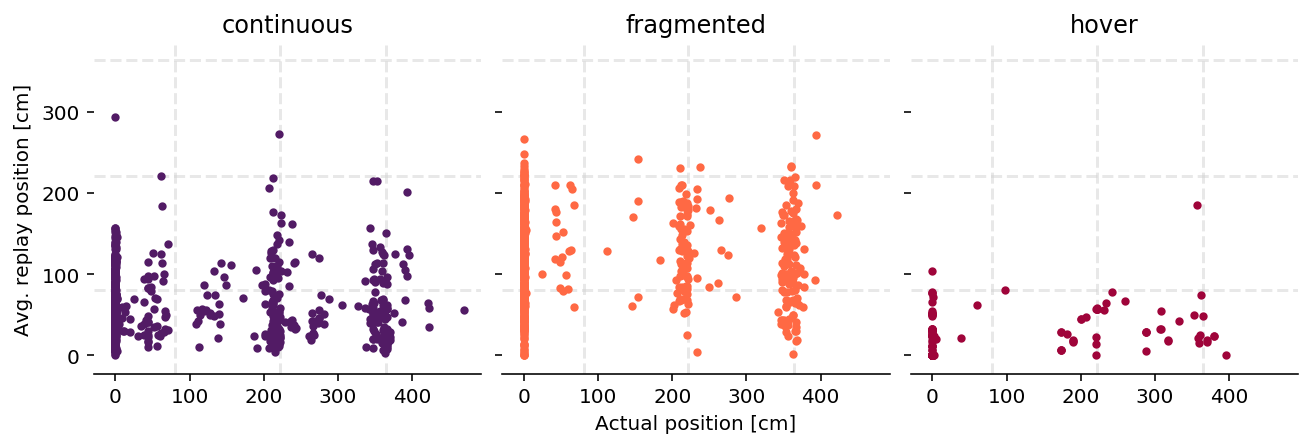

In [40]:
fig, axes = plt.subplots(1, 3, constrained_layout=True, figsize=(9, 3), sharex=True, sharey=True)
state_names = ['continuous', 'fragmented', 'hover']
for ax, state in zip(axes.flat, state_names):
    ax.scatter(replay_info['actual_linear_position2'],
               replay_info[f'{state}_replay_linear_position'],
               color=STATE_COLORS[state], s=10)
    ax.set_title(state)
    ax.axvline(replay_info.choice_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
    ax.axvline(replay_info.left_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
    ax.axvline(replay_info.right_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.choice_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.left_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.right_well_position.mean(), color='lightgrey', zorder=0, linestyle='--', alpha=0.5)
sns.despine(left=True)
axes[0].set_ylabel('Avg. replay position [cm]');
axes[1].set_xlabel('Actual position [cm]');

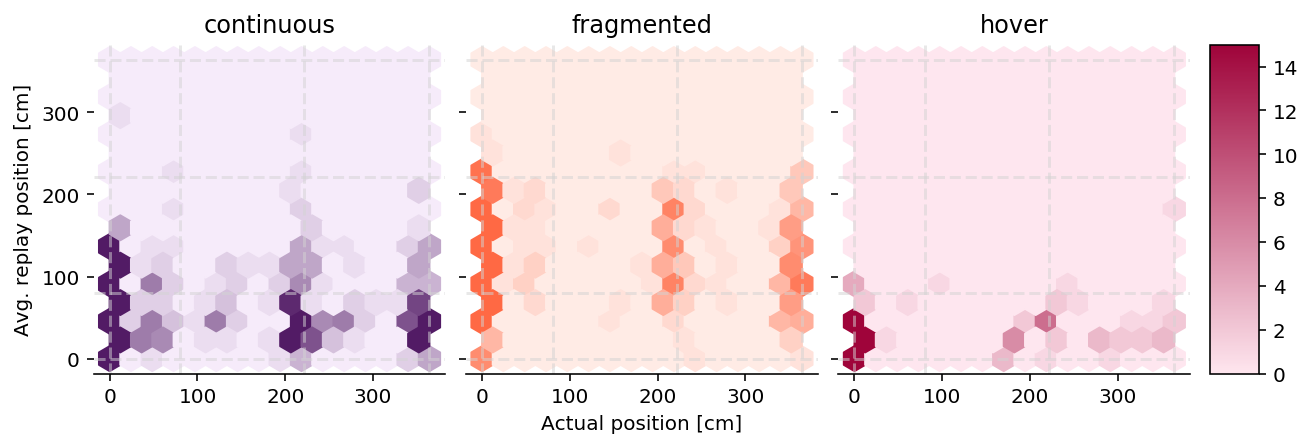

In [41]:
fig, axes = plt.subplots(1, 3, constrained_layout=True, figsize=(9, 3), sharex=True, sharey=True)
state_names = ['continuous', 'fragmented', 'hover']
for ax, state in zip(axes.flat, state_names):
    cmap = sns.light_palette(STATE_COLORS[state], as_cmap=True)
    h = ax.hexbin(replay_info['actual_linear_position2'],
              replay_info[f'{state}_replay_linear_position'],
              gridsize=15, extent=(0, replay_info.left_well_position.mean(), 0, replay_info.left_well_position.mean()),
              vmin=0.0, vmax=15, cmap=cmap)
    ax.set_title(state)

    ax.axvline(replay_info.center_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axvline(replay_info.choice_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axvline(replay_info.left_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axvline(replay_info.right_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)

    ax.axhline(replay_info.center_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.choice_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.left_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.right_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
sns.despine(left=True)
axes[0].set_ylabel('Avg. replay position [cm]');
axes[1].set_xlabel('Actual position [cm]')
plt.colorbar(h, ax=axes[-1])

Text(0, 0.5, '')

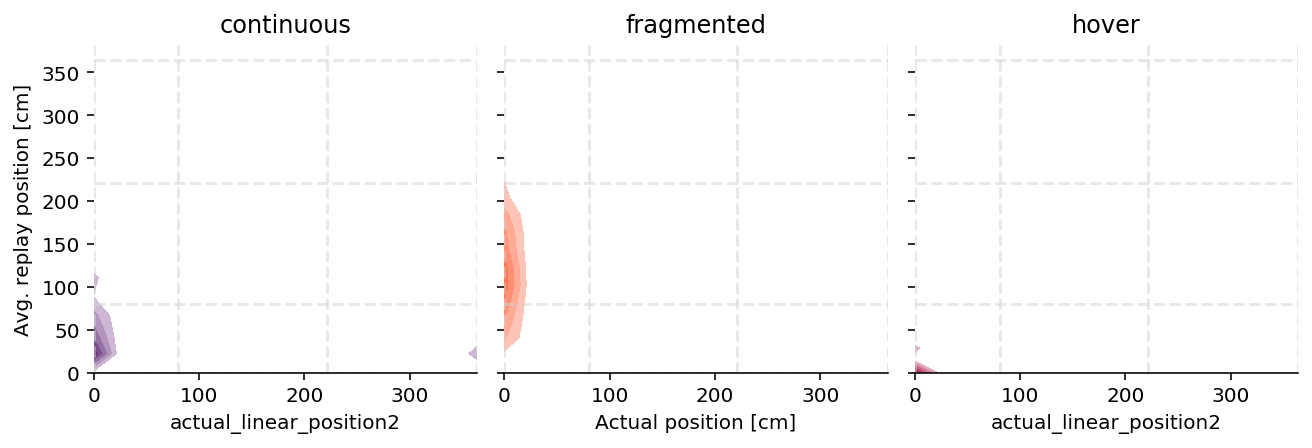

In [42]:
fig, axes = plt.subplots(1, 3, constrained_layout=True, figsize=(9, 3), sharex=True, sharey=True)
state_names = ['continuous', 'fragmented', 'hover']
for ax, state in zip(axes.flat, state_names):
    cmap = sns.light_palette(STATE_COLORS[state], as_cmap=True)
    temp_df =  replay_info.loc[:, ['actual_linear_position2', f'{state}_replay_linear_position']].dropna()
    h = sns.kdeplot(temp_df['actual_linear_position2'],
              temp_df[f'{state}_replay_linear_position'],
              clip=(0, replay_info.left_well_position.mean(), 0, replay_info.left_well_position.mean()),
              vmin=0.0, cmap=cmap, ax=ax, bw=5, shade=True, gridsize=15, shade_lowest=False, n_levels=5)
    ax.set_title(state)
    ax.axvline(replay_info.center_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axvline(replay_info.choice_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axvline(replay_info.left_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axvline(replay_info.right_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)

    ax.axhline(replay_info.center_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.choice_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.left_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
    ax.axhline(replay_info.right_well_position.mean(), color='lightgrey', zorder=1, linestyle='--', alpha=0.5)
sns.despine(left=True)
axes[0].set_ylabel('Avg. replay position [cm]');
axes[1].set_xlabel('Actual position [cm]')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
# plt.colorbar(h, ax=axes[-1])

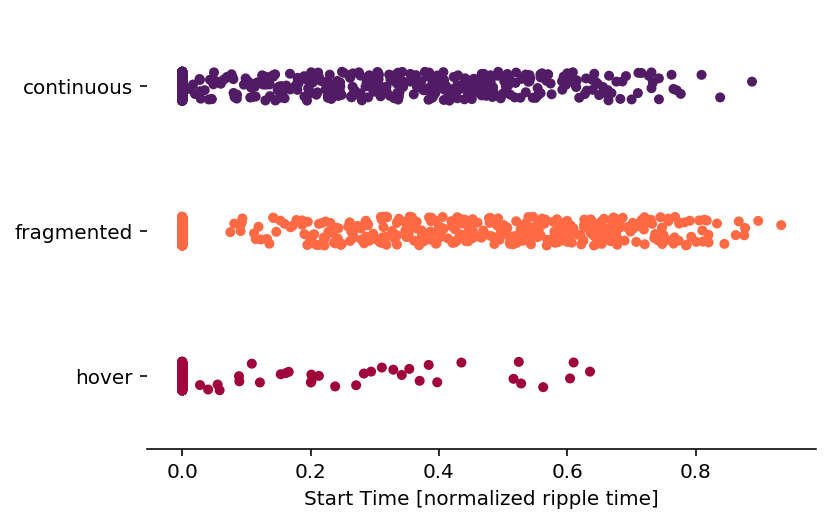

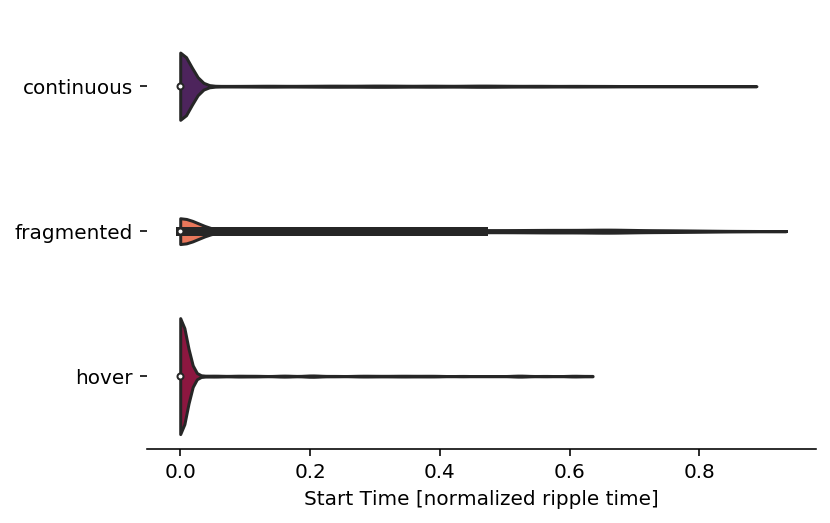

In [43]:
is_col = replay_info.columns.str.endswith('_min_time')
data = (replay_info.loc[:, is_col].rename(columns=lambda c: c.split('_')[0])) / (replay_info.duration.values[:, np.newaxis] * 1000)
sns.stripplot(data=data,
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('Start Time [normalized ripple time]')
sns.despine(left=True)

plt.figure()
sns.violinplot(data=data,
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, bw=0.1)
plt.xlabel('Start Time [normalized ripple time]')
sns.despine(left=True)

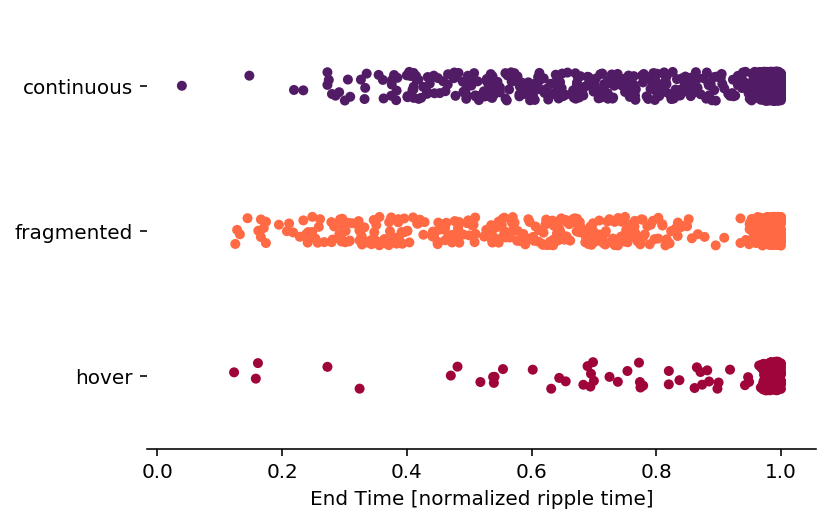

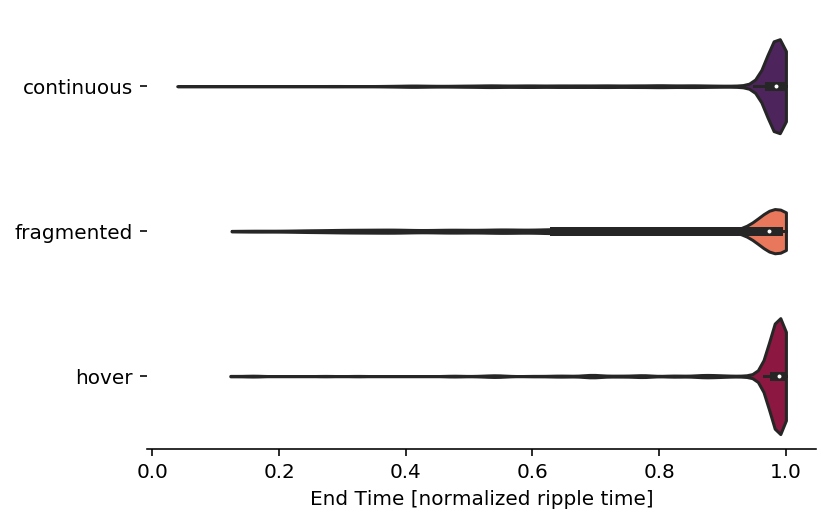

In [44]:
is_col = replay_info.columns.str.endswith('_max_time')
data = (replay_info.loc[:, is_col].rename(columns=lambda c: c.split('_')[0])) / (replay_info.duration.values[:, np.newaxis] * 1000)
sns.stripplot(data=data,
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS)
plt.xlabel('End Time [normalized ripple time]')
sns.despine(left=True)

plt.figure()
sns.violinplot(data=data,
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, bw=0.1)
plt.xlabel('End Time [normalized ripple time]')
sns.despine(left=True)

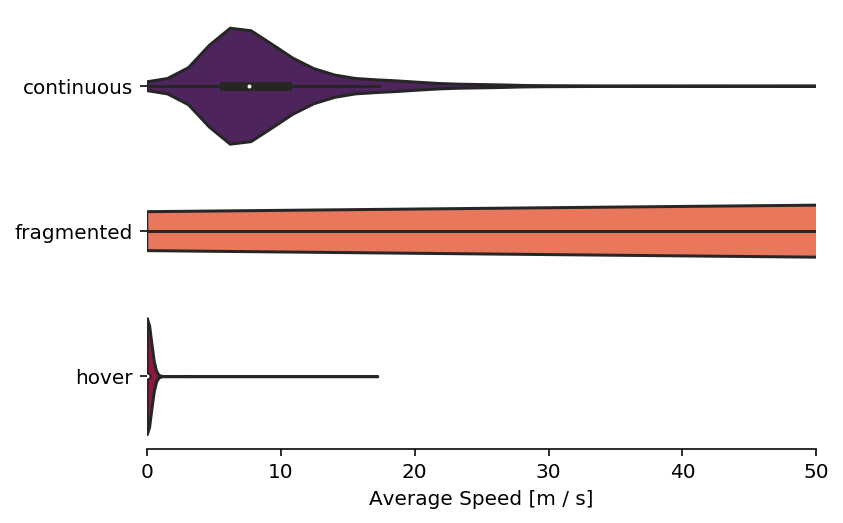

In [45]:
is_col = replay_info.columns.str.endswith('_replay_speed')
sns.violinplot(data=10000 * (replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0, scale='width')
plt.xlabel('Average Speed [m / s]')
plt.xlim((-0.001, 50))
sns.despine(left=True)

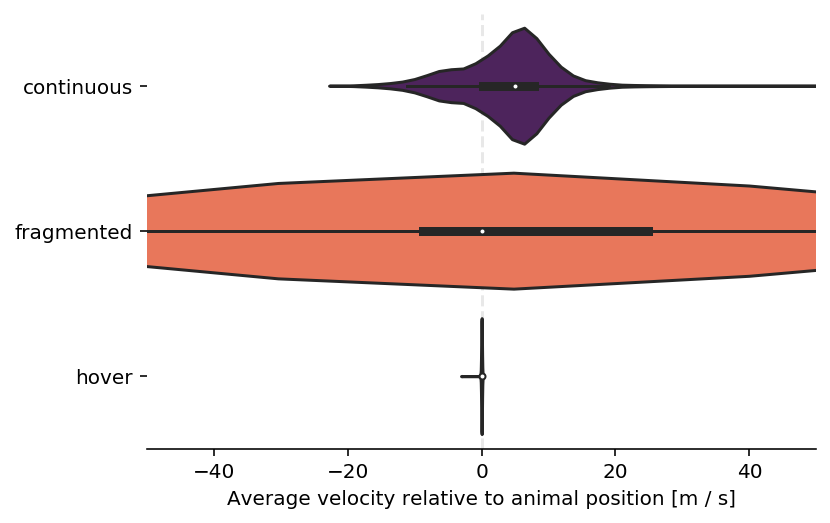

In [58]:
is_col = replay_info.columns.str.endswith('_replay_velocity')
sns.violinplot(data=10000 * (replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, scale='width')
plt.xlabel('Average velocity relative to animal position [m / s]')
plt.xlim([-50, 50])
plt.axvline(0, linestyle='--', zorder=0, color='lightgrey', alpha=0.5)
sns.despine(left=True)

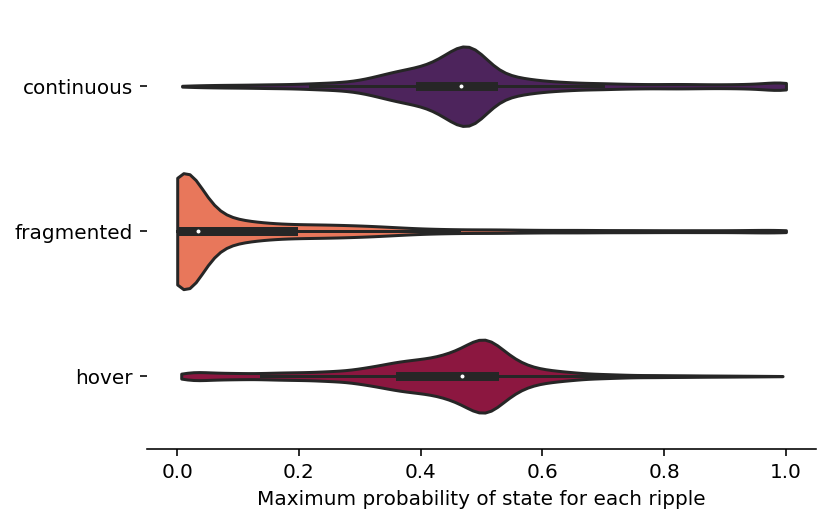

In [47]:
plt.figure()
is_col = replay_info.columns.str.endswith('_max_probability')
sns.violinplot(data=(replay_info.loc[:, is_col]
                    .rename(columns=lambda c: c.split('_')[0])),
              order=['continuous', 'fragmented', 'hover'],
              orient='horizontal',
              palette=STATE_COLORS, cut=0)
plt.xlabel('Maximum probability of state for each ripple')
sns.despine(left=True)

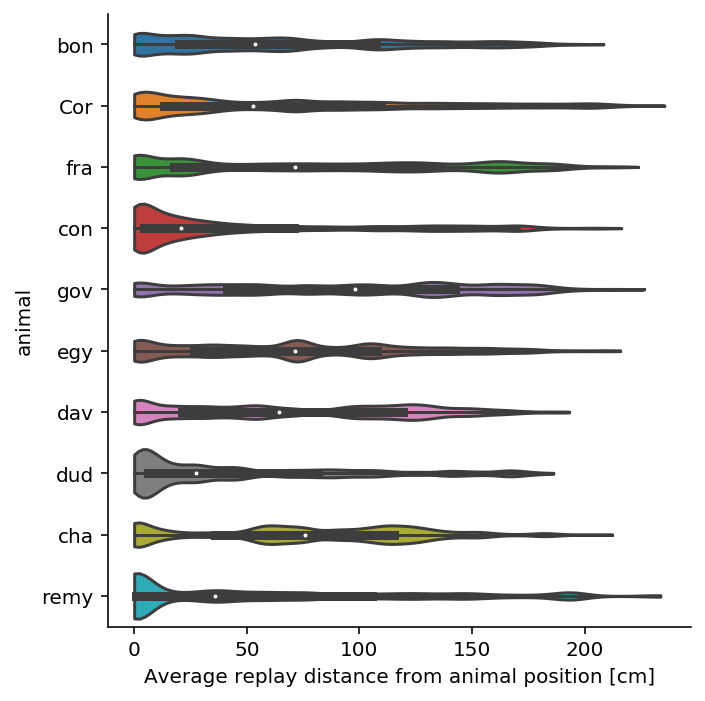

In [48]:
sns.catplot(x='replay_distance_from_actual_position', y='animal', data=replay_info.reset_index(), kind="violin", jitter=True, aspect=1, cut=0, bw=0.1)
plt.xlabel('Average replay distance from animal position [cm]');

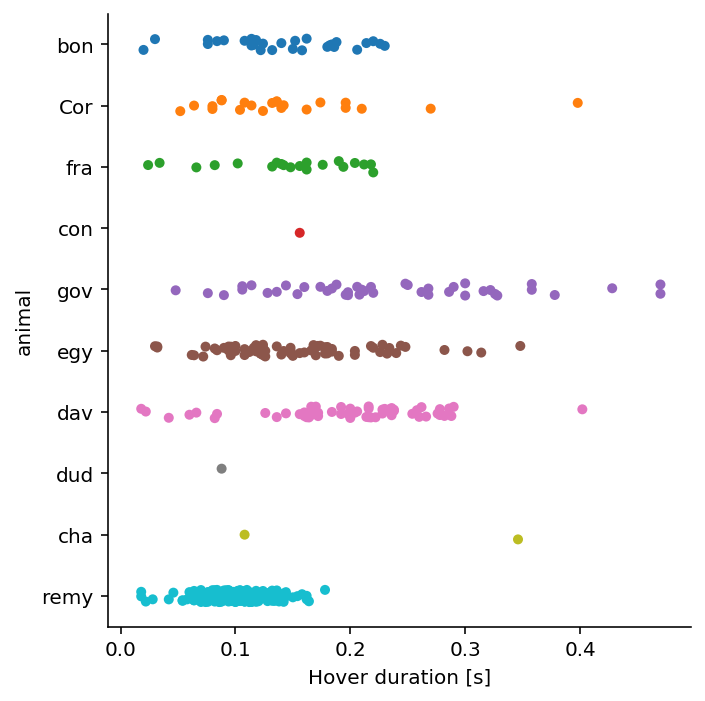

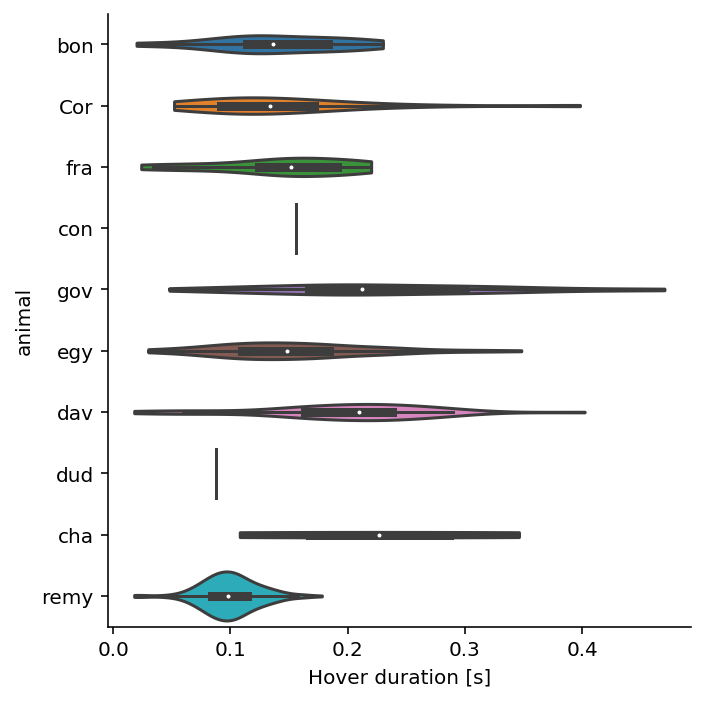

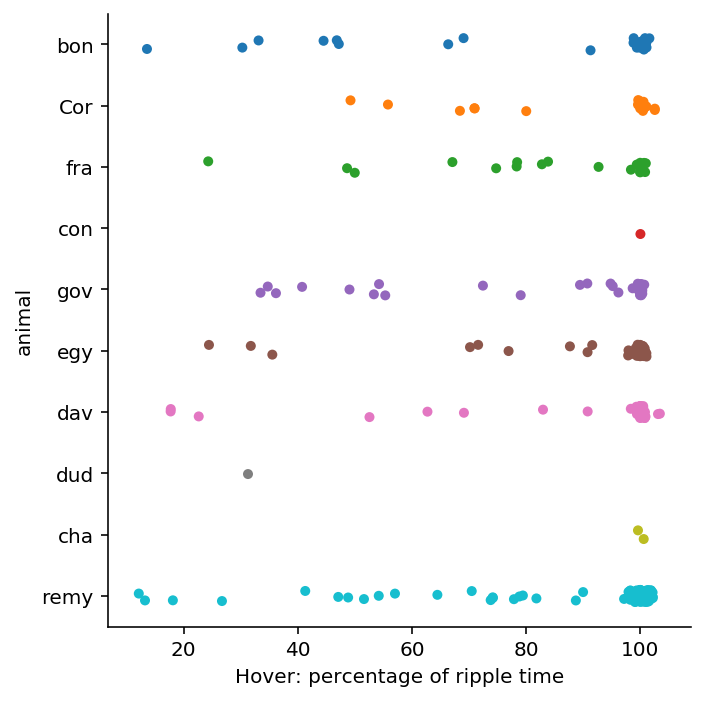

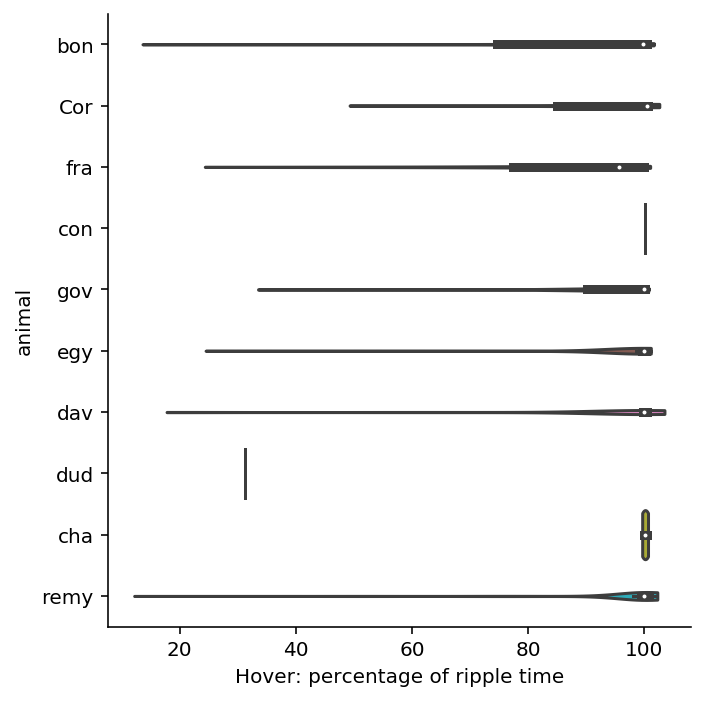

In [49]:
sns.catplot(x='hover_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="strip", jitter=True, aspect=1)
plt.xlabel('Hover duration [s]');

sns.catplot(x='hover_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="violin", jitter=True, aspect=1, cut=0)
plt.xlabel('Hover duration [s]');

hover_pct = 100 * (replay_info.hover_duration / replay_info.duration).replace(0.0, np.nan).rename('hover_percentage')
sns.catplot(x='hover_percentage', y='animal', data=hover_pct.reset_index().replace(0.0, np.nan), kind="strip", jitter=True)
plt.xlabel('Hover: percentage of ripple time');

sns.catplot(x='hover_percentage', y='animal', data=hover_pct.reset_index().replace(0.0, np.nan), kind="violin", jitter=True, aspect=1, cut=0)
plt.xlabel('Hover: percentage of ripple time');

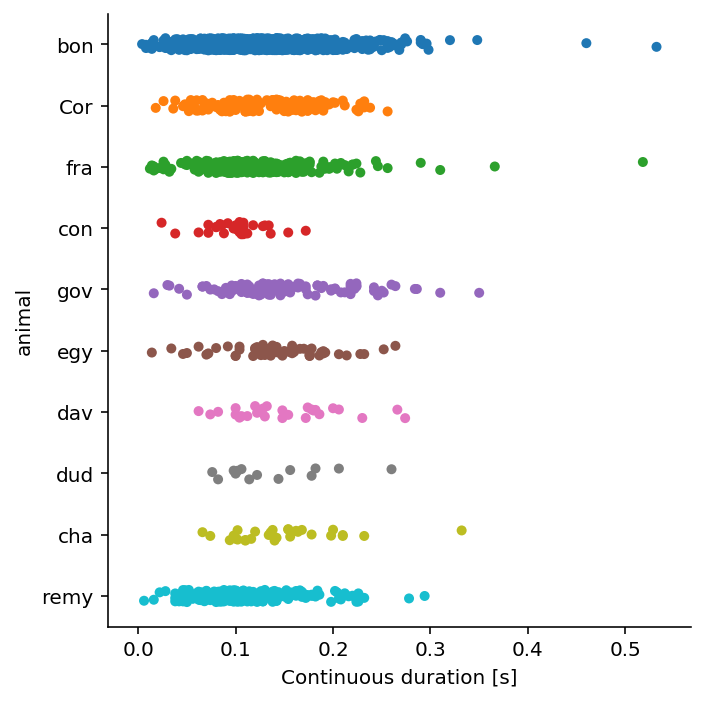

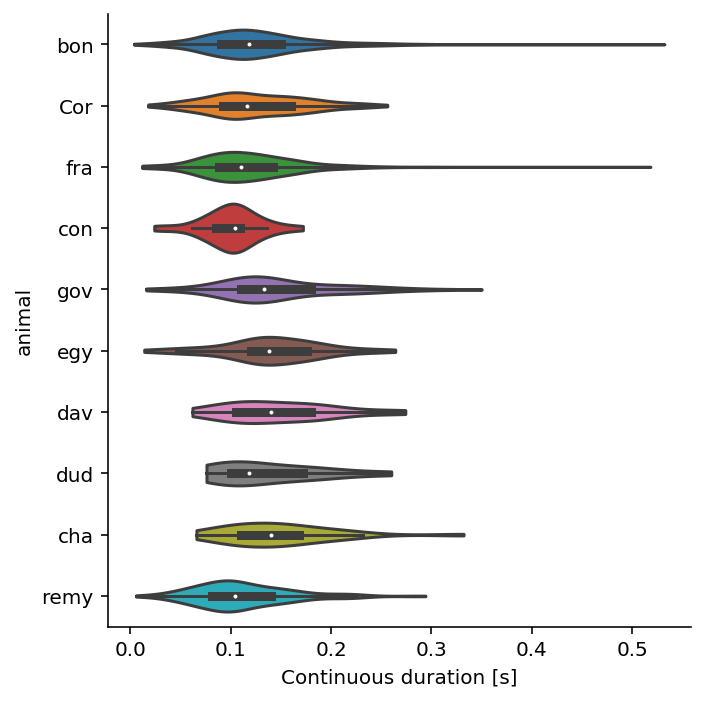

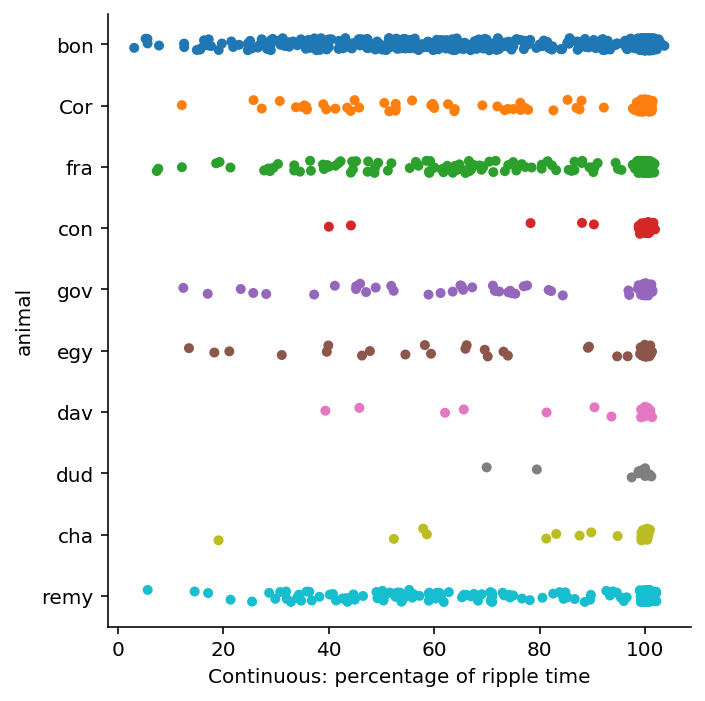

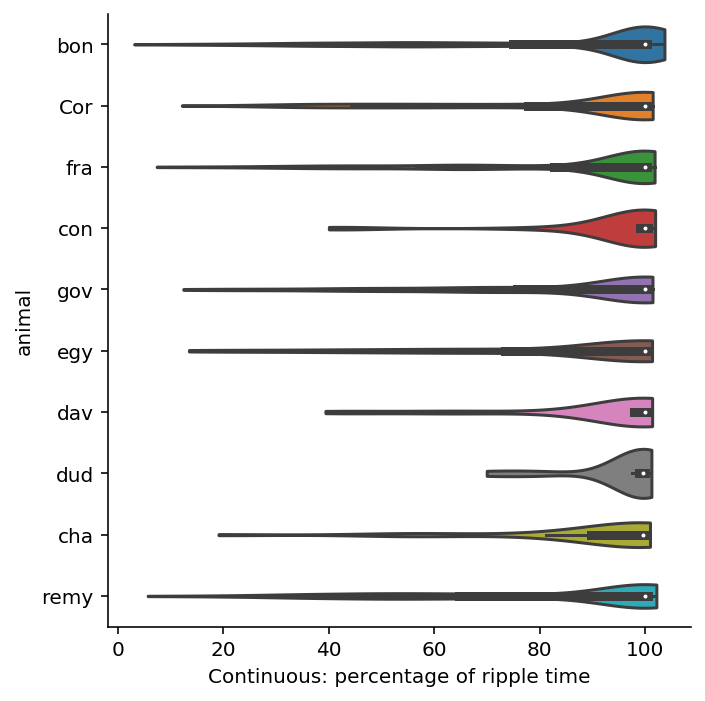

In [50]:
sns.catplot(x='continuous_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="strip", jitter=True, aspect=1)
plt.xlabel('Continuous duration [s]');

sns.catplot(x='continuous_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="violin", jitter=True, aspect=1, cut=0)
plt.xlabel('Continuous duration [s]');

continuous_pct = 100 * (replay_info.continuous_duration / replay_info.duration).replace(0.0, np.nan).rename('continuous_percentage')
sns.catplot(x='continuous_percentage', y='animal', data=continuous_pct.reset_index().replace(0.0, np.nan), kind="strip", jitter=True)
plt.xlabel('Continuous: percentage of ripple time');

sns.catplot(x='continuous_percentage', y='animal', data=continuous_pct.reset_index().replace(0.0, np.nan), kind="violin", jitter=True, aspect=1, cut=0)
plt.xlabel('Continuous: percentage of ripple time');

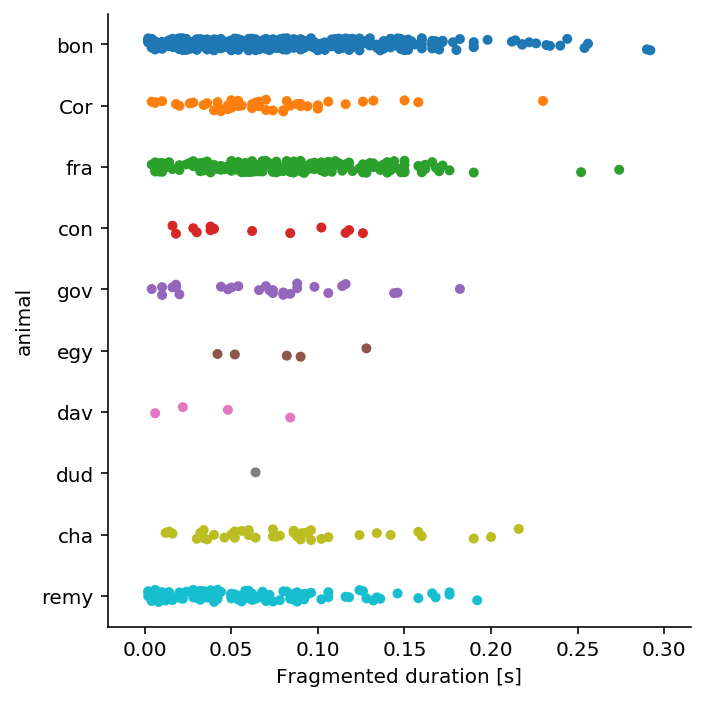

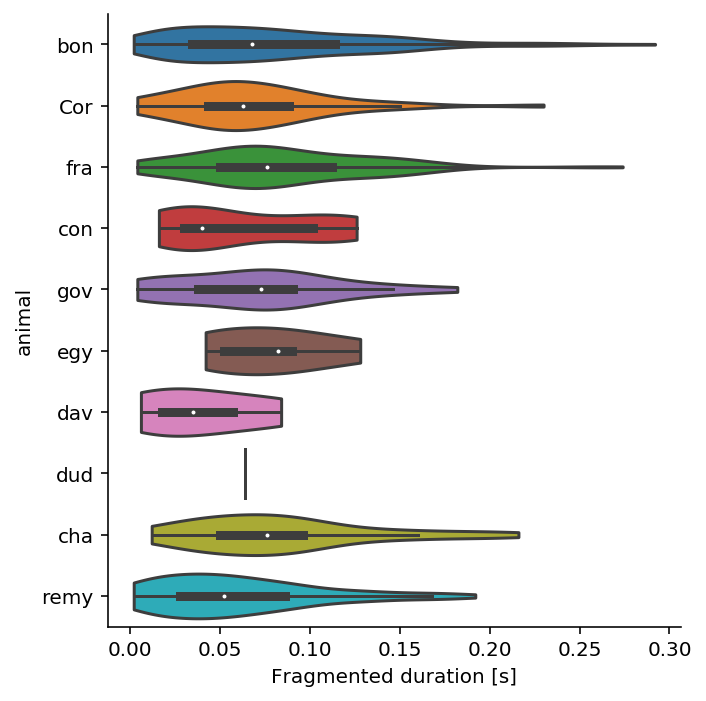

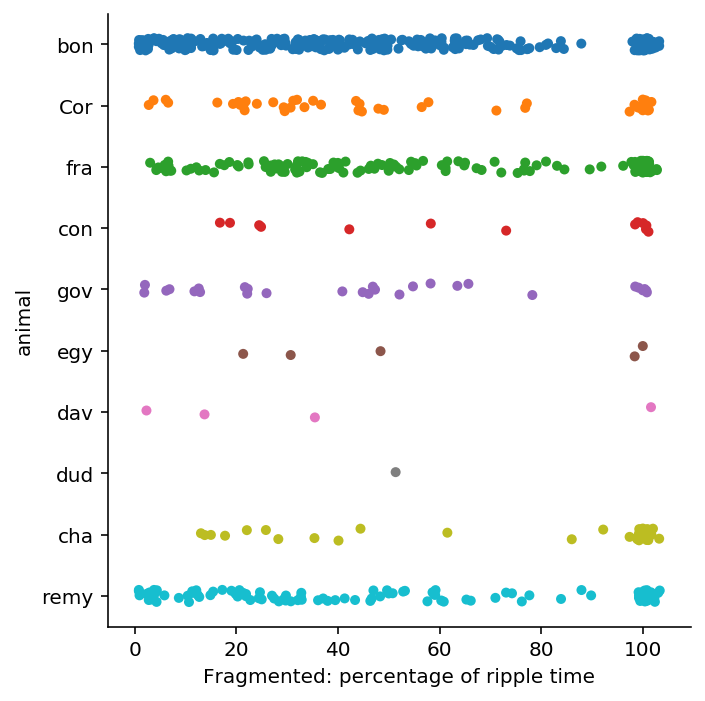

In [51]:
sns.catplot(x='fragmented_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="strip", jitter=True, aspect=1)
plt.xlabel('Fragmented duration [s]');

sns.catplot(x='fragmented_duration', y='animal', data=replay_info.reset_index().replace(0.0, np.nan), kind="violin", jitter=True, aspect=1, cut=0)
plt.xlabel('Fragmented duration [s]');

fragmented_pct = 100 * (replay_info.fragmented_duration / replay_info.duration).replace(0.0, np.nan).rename('fragmented_percentage')
sns.catplot(x='fragmented_percentage', y='animal', data=fragmented_pct.reset_index().replace(0.0, np.nan), kind="strip", jitter=True)
plt.xlabel('Fragmented: percentage of ripple time');

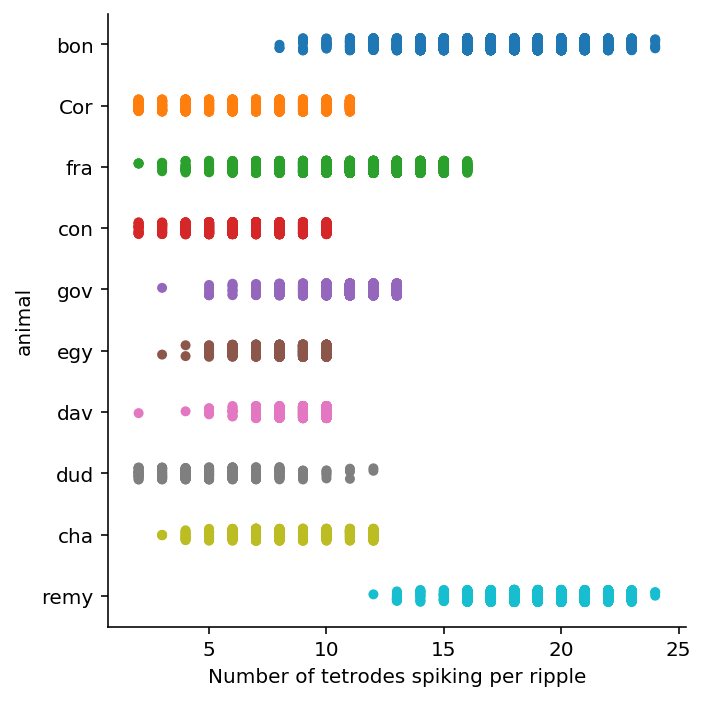

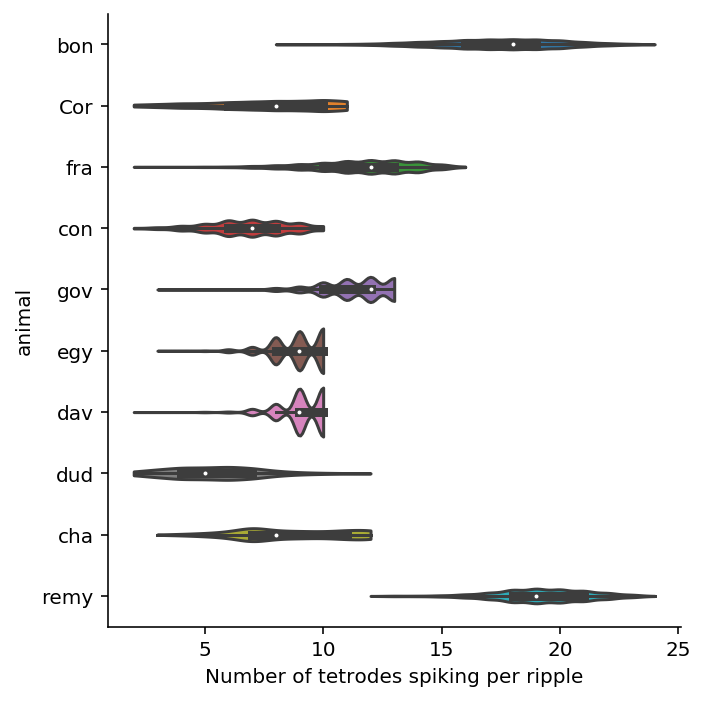

In [52]:
sns.catplot(x='n_unique_spiking', y='animal', data=replay_info.reset_index(), kind='strip', aspect=1)
plt.xlabel('Number of tetrodes spiking per ripple');

sns.catplot(x='n_unique_spiking', y='animal', data=replay_info.reset_index(), kind='violin', aspect=1, cut=0)
plt.xlabel('Number of tetrodes spiking per ripple');

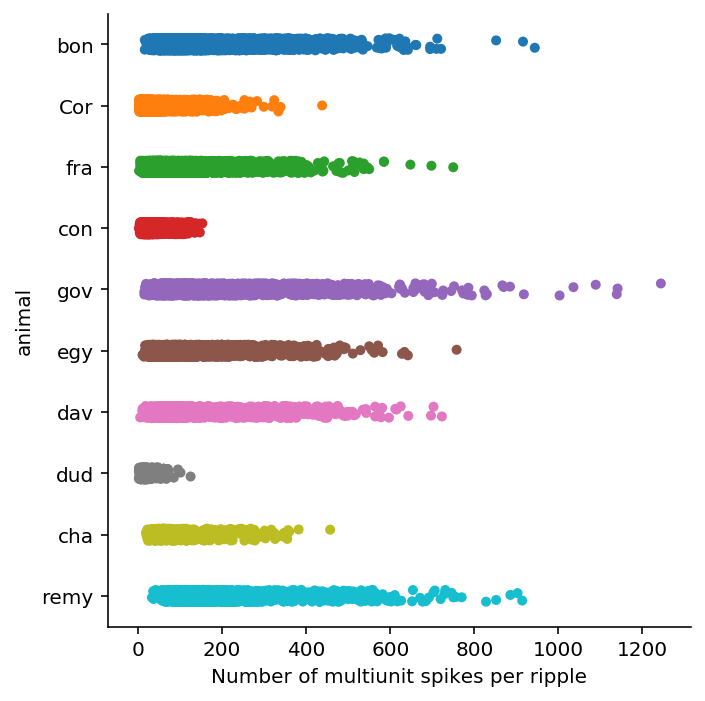

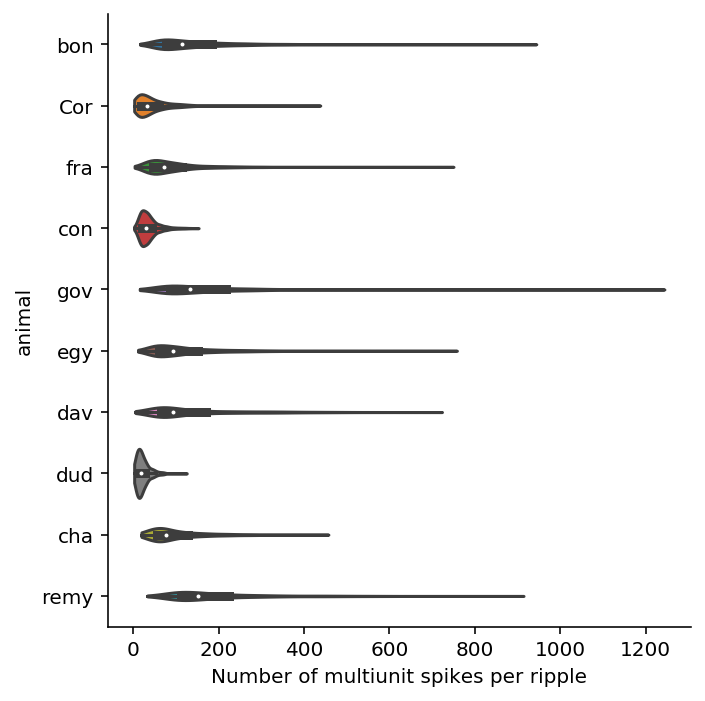

In [53]:
sns.catplot(x='n_total_spikes', y='animal', data=replay_info.reset_index(), kind="strip",)
plt.xlabel('Number of multiunit spikes per ripple');

sns.catplot(x='n_total_spikes', y='animal', data=replay_info.reset_index(), kind="violin", cut=0)
plt.xlabel('Number of multiunit spikes per ripple');

# Epoch Info

In [54]:
from src.parameters import ANIMALS, _BRAIN_AREAS
from loren_frank_data_processing import make_epochs_dataframe, make_neuron_dataframe, make_tetrode_dataframe

epoch_info = make_epochs_dataframe(ANIMALS)
neuron_info = make_neuron_dataframe(ANIMALS)
neuron_info = neuron_info.loc[
    (neuron_info.type == 'principal') &
    (neuron_info.numspikes > 100) &
    neuron_info.area.isin(_BRAIN_AREAS)]
n_neurons = (neuron_info
             .groupby(['animal', 'day', 'epoch'])
             .neuron_id
             .agg(len)
             .rename('n_neurons')
             .to_frame())

epoch_info = epoch_info.join(n_neurons)
is_w_track = (epoch_info.environment
              .isin(['TrackA', 'TrackB', 'WTrackA', 'WTrackB', 'wtrack']))
epoch_info = epoch_info[is_w_track & ((epoch_info.n_neurons > 9) | (epoch_info.index.get_level_values('animal') == 'remy'))]

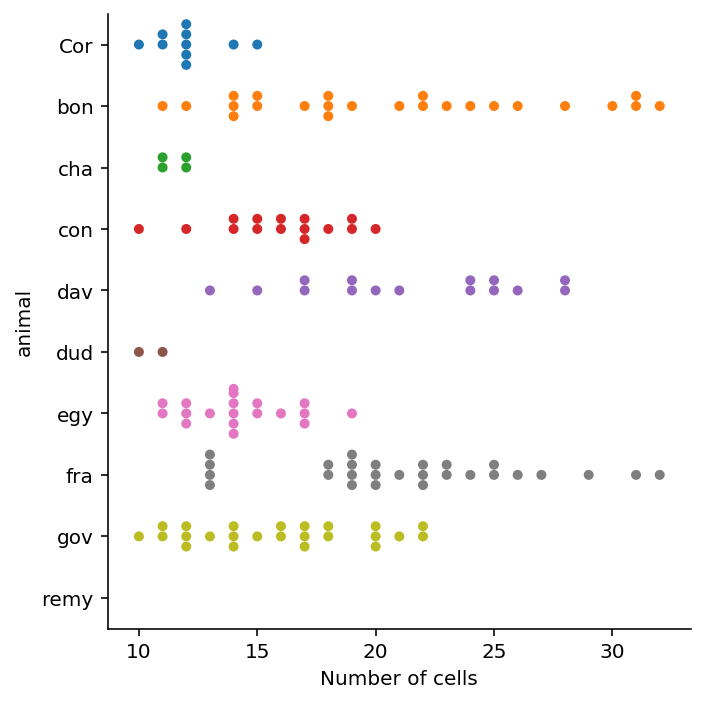

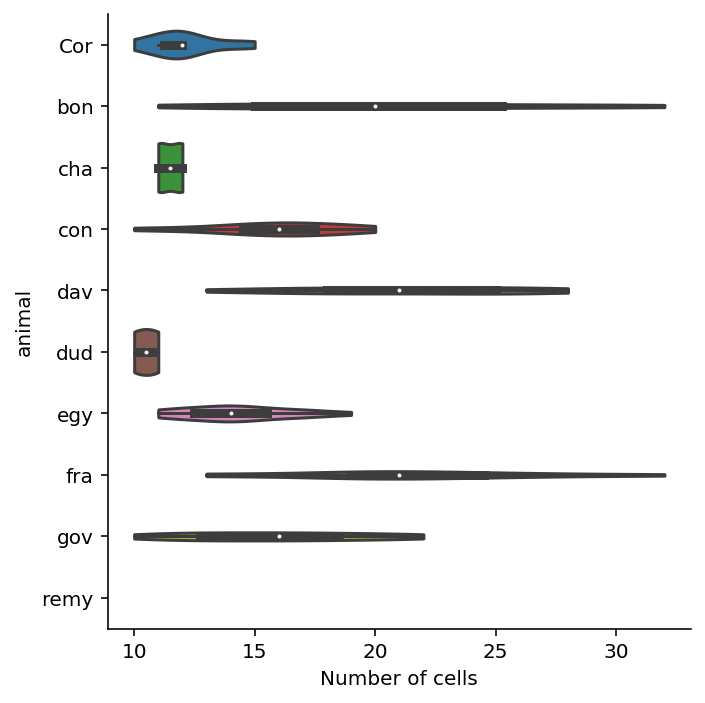

In [55]:
sns.catplot(x='n_neurons', y='animal', data=epoch_info.reset_index(), kind='swarm')
plt.xlabel('Number of cells')
sns.catplot(x='n_neurons', y='animal', data=epoch_info.reset_index(), kind='violin', cut=0)
plt.xlabel('Number of cells');

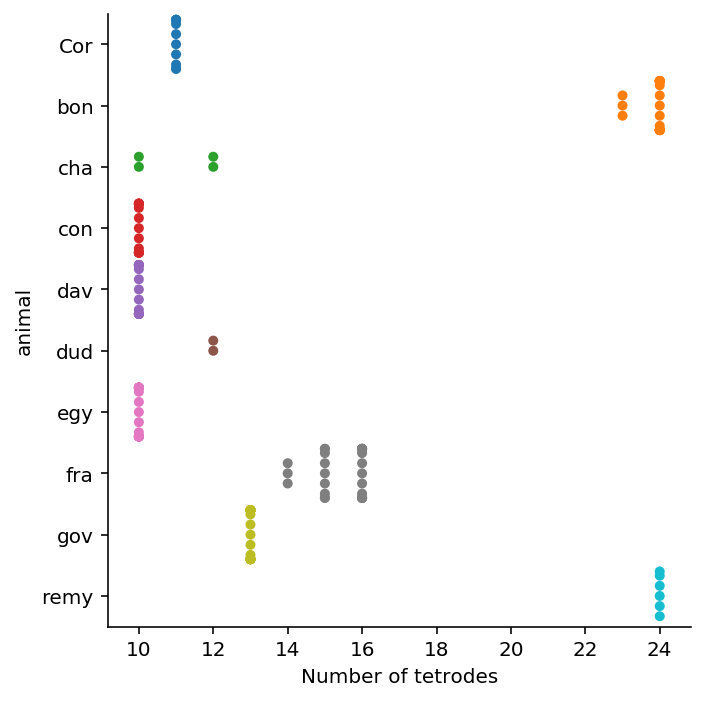

In [56]:
tetrode_info = make_tetrode_dataframe(ANIMALS)
is_brain_areas = (
        tetrode_info.area.astype(str).str.upper().isin(_BRAIN_AREAS))
n_tetrodes = (tetrode_info.loc[is_brain_areas]
              .groupby(['animal', 'day', 'epoch'])
              .tetrode_id
              .agg(len)
              .rename('n_tetrodes')
              .to_frame()
              .loc[epoch_info.index])
sns.catplot(x='n_tetrodes', y='animal', data=n_tetrodes.reset_index(), kind='swarm')
plt.xlabel('Number of tetrodes');